In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/전국연도별방문자회계정보정말정말최종ver.csv'
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,축제명,개최년도,축제기간(일),(현지인)방문자수,(외지인)방문자수,(외국인)방문자수,(전체)방문자수,일평균 방문자수,전년도 일평균 방문자수,일평균 방문자수 증감률,...,회계연도,지역명,행사축제명,총비용,사업수익,순원가,시작월,종료월,index_y,normalized_index_y
0,강경젓갈축제,2018,5,50642,59291,108,110041,22008.20,NaN,NaN,...,2018.0,충남,강경젓갈축제,8.250000e+08,183950000.0,6.410500e+08,10.0,10.0,강경젓갈축제2018,강경젓갈축제2018
1,강경젓갈축제,2022,5,57971,69910,19,127900,25580.00,22008.2,16.2,...,2022.0,충남,강경젓갈축제,1.003000e+09,0.0,1.003000e+09,10.0,10.0,강경젓갈축제2022,강경젓갈축제2022
2,강경젓갈축제,2023,4,52282,71999,18,124299,31074.75,25580.0,21.5,...,2023.0,충남,강경젓갈축제,1.178086e+09,0.0,1.178086e+09,10.0,10.0,강경젓갈축제2023,강경젓갈축제2023
3,강릉커피축제,2018,5,61368,82621,279,144268,28853.60,NaN,NaN,...,2018.0,강원,강릉커피축제,3.904450e+08,40000000.0,3.504450e+08,10.0,10.0,강릉커피축제2018,강릉커피축제2018
4,강릉커피축제,2019,4,98907,61246,743,160896,40224.00,28853.6,39.4,...,2019.0,강원,강릉커피축제,4.400000e+08,91000000.0,3.490000e+08,10.0,10.0,강릉커피축제2019,강릉커피축제2019


In [4]:
df.columns

Index(['축제명', '개최년도', '축제기간(일)', '(현지인)방문자수', '(외지인)방문자수', '(외국인)방문자수',
       '(전체)방문자수', '일평균 방문자수', '전년도 일평균 방문자수', '일평균 방문자수 증감률', '(이전)전체방문자',
       '(전체)방문자증감', '(현지인)방문자비율', '(외지인)방문자비율', '(외국인)방문자비율', '전년대비방문자증감비율',
       'index_x', '도', '시군구', 'normalized_index_x', 'df1_index', 'df2_index',
       '회계연도', '지역명', '행사축제명', '총비용', '사업수익', '순원가', '시작월', '종료월', 'index_y',
       'normalized_index_y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   축제명                 319 non-null    object 
 1   개최년도                319 non-null    int64  
 2   축제기간(일)             319 non-null    int64  
 3   (현지인)방문자수           319 non-null    int64  
 4   (외지인)방문자수           319 non-null    int64  
 5   (외국인)방문자수           319 non-null    int64  
 6   (전체)방문자수            319 non-null    int64  
 7   일평균 방문자수            319 non-null    float64
 8   전년도 일평균 방문자수        233 non-null    float64
 9   일평균 방문자수 증감률        233 non-null    float64
 10  (이전)전체방문자           233 non-null    float64
 11  (전체)방문자증감           319 non-null    int64  
 12  (현지인)방문자비율          319 non-null    float64
 13  (외지인)방문자비율          319 non-null    float64
 14  (외국인)방문자비율          319 non-null    float64
 15  전년대비방문자증감비율         319 non-null    float64
 16  index_x 

In [6]:
df.describe()

,개최년도,축제기간(일),(현지인)방문자수,(외지인)방문자수,(외국인)방문자수,(전체)방문자수,일평균 방문자수,전년도 일평균 방문자수,일평균 방문자수 증감률,(이전)전체방문자,...,(현지인)방문자비율,(외지인)방문자비율,(외국인)방문자비율,전년대비방문자증감비율,회계연도,총비용,사업수익,순원가,시작월,종료월
count,319.000000,319.000000,319.000000,3.190000e+02,319.000000,3.190000e+02,319.000000,233.000000,233.000000,2.330000e+02,...,319.000000,319.000000,319.000000,319.000000,272.000000,2.720000e+02,2.720000e+02,2.720000e+02,272.000000,272.000000
mean,2020.482759,5.796238,92140.269592,9.976657e+04,392.423197,1.922993e+05,36442.436884,35402.096752,11.640343,1.891400e+05,...,47.806207,51.993856,0.199655,12.805987,2020.349265,1.210804e+09,1.094268e+08,1.101377e+09,7.639706,7.955882
std,2.084425,4.694355,92154.309449,9.936225e+04,1114.243198,1.689582e+05,21132.598309,20751.964478,43.656674,1.729793e+05,...,15.252079,15.272106,0.423321,88.982284,2.081211,1.051956e+09,2.829158e+08,1.038647e+09,2.631551,2.534974
min,2018.000000,2.000000,8621.000000,9.699000e+03,1.000000,3.003000e+04,4511.555600,4511.555600,-83.600000,3.481400e+04,...,9.080000,13.860000,0.000000,-83.610000,2018.000000,0.000000e+00,0.000000e+00,-1.019292e+09,1.000000,1.000000
25%,2018.000000,3.000000,43434.500000,4.744250e+04,34.500000,9.737650e+04,21756.055550,20474.250000,-5.800000,9.628400e+04,...,37.110000,40.205000,0.020000,-3.695000,2018.000000,6.660879e+08,0.000000e+00,5.288383e+08,5.000000,5.000000
50%,2019.000000,4.000000,65601.000000,7.023000e+04,93.000000,1.439770e+05,32501.500000,31393.750000,4.900000,1.372190e+05,...,47.980000,51.910000,0.070000,0.000000,2019.000000,9.448705e+08,0.000000e+00,8.776825e+08,9.000000,9.000000
75%,2023.000000,5.000000,104223.000000,1.190260e+05,318.000000,2.218935e+05,45643.726200,45326.250000,20.100000,2.223420e+05,...,59.770000,62.710000,0.185000,14.280000,2022.000000,1.464853e+09,1.196925e+08,1.390172e+09,10.000000,10.000000
max,2023.000000,37.000000,714686.000000,1.213604e+06,15023.000000,1.663609e+06,125799.400000,125799.400000,449.200000,1.663609e+06,...,85.990000,90.890000,3.620000,1364.630000,2023.000000,1.242086e+10,3.053558e+09,1.242086e+10,12.000000,12.000000


In [7]:
# 결측치 확인
df.isnull().sum()

축제명                    0
개최년도                   0
축제기간(일)                0
(현지인)방문자수              0
(외지인)방문자수              0
(외국인)방문자수              0
(전체)방문자수               0
일평균 방문자수               0
전년도 일평균 방문자수          86
일평균 방문자수 증감률          86
(이전)전체방문자             86
(전체)방문자증감              0
(현지인)방문자비율             0
(외지인)방문자비율             0
(외국인)방문자비율             0
전년대비방문자증감비율            0
index_x                0
도                      0
시군구                    0
normalized_index_x     0
df1_index             47
df2_index             47
회계연도                  47
지역명                   47
행사축제명                 47
총비용                   47
사업수익                  47
순원가                   47
시작월                   47
종료월                   47
index_y               47
normalized_index_y    47
dtype: int64

In [8]:
# 결측치 처리

# 평균값으로 계산
# 전년도 일평균 방문자수          86
# 일평균 방문자수 증감률          86
# (이전)전체방문자             86

# 제외
# df1_index             47
# df2_index             47
# 지역명                   47
# 행사축제명                 47
# index_y               47
# normalized_index_y    47

# unknown으로 대체
# 회계연도                  47 
# 시작월                   47
# 종료월                   47

#0으로 채움
# 총비용                   47
# 사업수익                  47
# 순원가                   47




In [9]:
#'전년도 일평균 방문자수', '일평균 방문자수 증감률', '(이전)전체방문자'는 평균값으로 대체

df['전년도 일평균 방문자수'] = df['전년도 일평균 방문자수'].fillna(df['전년도 일평균 방문자수'].mean())
df['일평균 방문자수 증감률'] = df['일평균 방문자수 증감률'].fillna(df['일평균 방문자수 증감률'].mean())
df['(이전)전체방문자'] = df['(이전)전체방문자'].fillna(df['(이전)전체방문자'].mean())



In [10]:
# '회계연도', '시작월', '종료월'은 'unknown'으로 대체
df['회계연도'] = df['회계연도'].fillna('unknown')
df['시작월'] = df['시작월'].fillna('unknown')
df['종료월'] = df['종료월'].fillna('unknown')

In [11]:
# '총비용', '사업수익', '순원가'는 0으로 대체
df['총비용'] = df['총비용'].fillna(0)
df['사업수익'] = df['사업수익'].fillna(0)
df['순원가'] = df['순원가'].fillna(0)


In [12]:
# 'df1_index', 'df2_index', '지역명', '행사축제명', 'index_y', 'index_x ', 'normalized_index_x', 'normalized_index_y'는 삭제
df.drop(['df1_index', 'df2_index', '지역명', '행사축제명', 'index_y', 'index_x', 'normalized_index_x', 'normalized_index_y'], axis=1, inplace=True)


In [13]:
df.isnull().sum()

축제명             0
개최년도            0
축제기간(일)         0
(현지인)방문자수       0
(외지인)방문자수       0
(외국인)방문자수       0
(전체)방문자수        0
일평균 방문자수        0
전년도 일평균 방문자수    0
일평균 방문자수 증감률    0
(이전)전체방문자       0
(전체)방문자증감       0
(현지인)방문자비율      0
(외지인)방문자비율      0
(외국인)방문자비율      0
전년대비방문자증감비율     0
도               0
시군구             0
회계연도            0
총비용             0
사업수익            0
순원가             0
시작월             0
종료월             0
dtype: int64

In [14]:
# 숫자형 컬럼에서 unknown을 NaN으로 대체
df.replace('unknown', np.nan, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20192\362896549.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('unknown', np.nan, inplace=True)


In [15]:
df.isnull().sum()

축제명              0
개최년도             0
축제기간(일)          0
(현지인)방문자수        0
(외지인)방문자수        0
(외국인)방문자수        0
(전체)방문자수         0
일평균 방문자수         0
전년도 일평균 방문자수     0
일평균 방문자수 증감률     0
(이전)전체방문자        0
(전체)방문자증감        0
(현지인)방문자비율       0
(외지인)방문자비율       0
(외국인)방문자비율       0
전년대비방문자증감비율      0
도                0
시군구              0
회계연도            47
총비용              0
사업수익             0
순원가              0
시작월             47
종료월             47
dtype: int64

In [16]:
unknown_cols = df.columns[df.isna().any()]
print("Unknown 값이 포함된 컬럼:", unknown_cols)

Unknown 값이 포함된 컬럼: Index(['회계연도', '시작월', '종료월'], dtype='object')


In [17]:
print(df.columns)

Index(['축제명', '개최년도', '축제기간(일)', '(현지인)방문자수', '(외지인)방문자수', '(외국인)방문자수',
       '(전체)방문자수', '일평균 방문자수', '전년도 일평균 방문자수', '일평균 방문자수 증감률', '(이전)전체방문자',
       '(전체)방문자증감', '(현지인)방문자비율', '(외지인)방문자비율', '(외국인)방문자비율', '전년대비방문자증감비율',
       '도', '시군구', '회계연도', '총비용', '사업수익', '순원가', '시작월', '종료월'],
      dtype='object')


In [18]:
# 열 이름에 공백 제거
df.columns = df.columns.str.strip()

In [19]:
print(df['축제기간(일)'].dtype)

int64


In [20]:
# 한글 폰트 설정 

import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 음수값

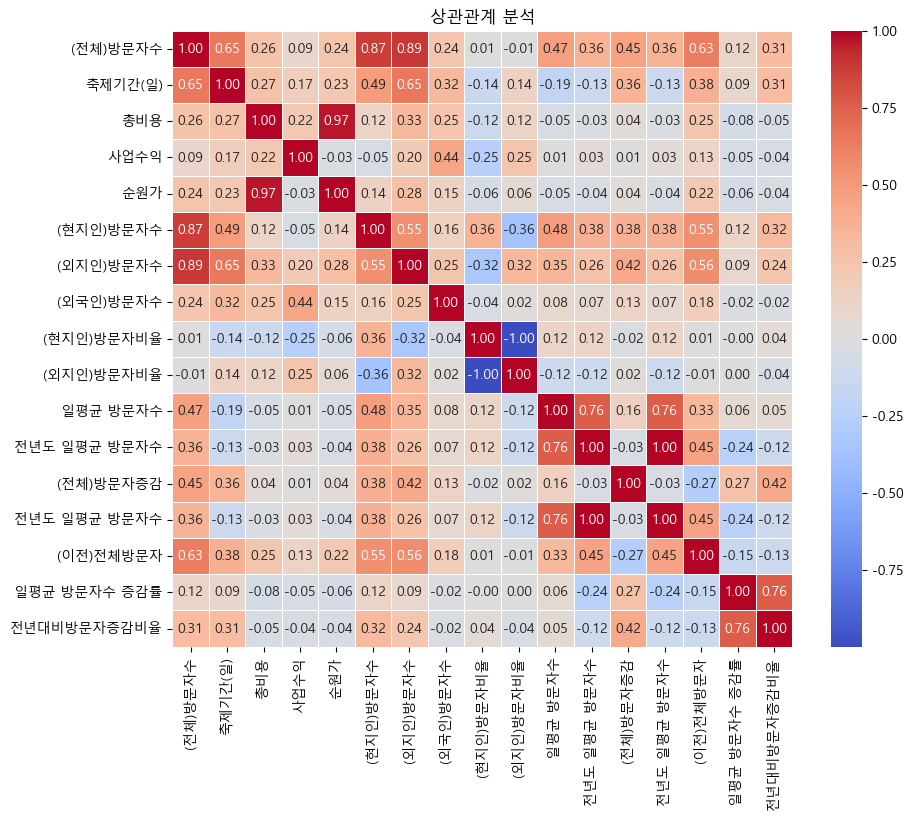

In [21]:
# 수치형 변수 선택
numerical_cols = [
    '(전체)방문자수',
    '축제기간(일)', 
    '총비용', 
    '사업수익', 
    '순원가', 
    '(현지인)방문자수', 
    '(외지인)방문자수', 
    '(외국인)방문자수',
    '(현지인)방문자비율', 
    '(외지인)방문자비율', 
    '일평균 방문자수', 
    '전년도 일평균 방문자수',
    '(전체)방문자증감', 
    '전년도 일평균 방문자수',  
    '(이전)전체방문자',
    '일평균 방문자수 증감률',
    '전년대비방문자증감비율'
]

# 상관관계 분석
correlation = df[numerical_cols].corr()

# 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('상관관계 분석')
plt.show()


In [22]:
correlation = df[numerical_cols].corr().round(2)
correlation

,(전체)방문자수,축제기간(일),총비용,사업수익,순원가,(현지인)방문자수,(외지인)방문자수,(외국인)방문자수,(현지인)방문자비율,(외지인)방문자비율,일평균 방문자수,전년도 일평균 방문자수,(전체)방문자증감,전년도 일평균 방문자수,(이전)전체방문자,일평균 방문자수 증감률,전년대비방문자증감비율
(전체)방문자수,1.00,0.65,0.26,0.09,0.24,0.87,0.89,0.24,0.01,-0.01,0.47,0.36,0.45,0.36,0.63,0.12,0.31
축제기간(일),0.65,1.00,0.27,0.17,0.23,0.49,0.65,0.32,-0.14,0.14,-0.19,-0.13,0.36,-0.13,0.38,0.09,0.31
총비용,0.26,0.27,1.00,0.22,0.97,0.12,0.33,0.25,-0.12,0.12,-0.05,-0.03,0.04,-0.03,0.25,-0.08,-0.05
사업수익,0.09,0.17,0.22,1.00,-0.03,-0.05,0.20,0.44,-0.25,0.25,0.01,0.03,0.01,0.03,0.13,-0.05,-0.04
순원가,0.24,0.23,0.97,-0.03,1.00,0.14,0.28,0.15,-0.06,0.06,-0.05,-0.04,0.04,-0.04,0.22,-0.06,-0.04
(현지인)방문자수,0.87,0.49,0.12,-0.05,0.14,1.00,0.55,0.16,0.36,-0.36,0.48,0.38,0.38,0.38,0.55,0.12,0.32
(외지인)방문자수,0.89,0.65,0.33,0.20,0.28,0.55,1.00,0.25,-0.32,0.32,0.35,0.26,0.42,0.26,0.56,0.09,0.24
(외국인)방문자수,0.24,0.32,0.25,0.44,0.15,0.16,0.25,1.00,-0.04,0.02,0.08,0.07,0.13,0.07,0.18,-0.02,-0.02
(현지인)방문자비율,0.01,-0.14,-0.12,-0.25,-0.06,0.36,-0.32,-0.04,1.00,-1.00,0.12,0.12,-0.02,0.12,0.01,-0.00,0.04
(외지인)방문자비율,-0.01,0.14,0.12,0.25,0.06,-0.36,0.32,0.02,-1.00,1.00,-0.12,-0.12,0.02,-0.12,-0.01,0.00,-0.04


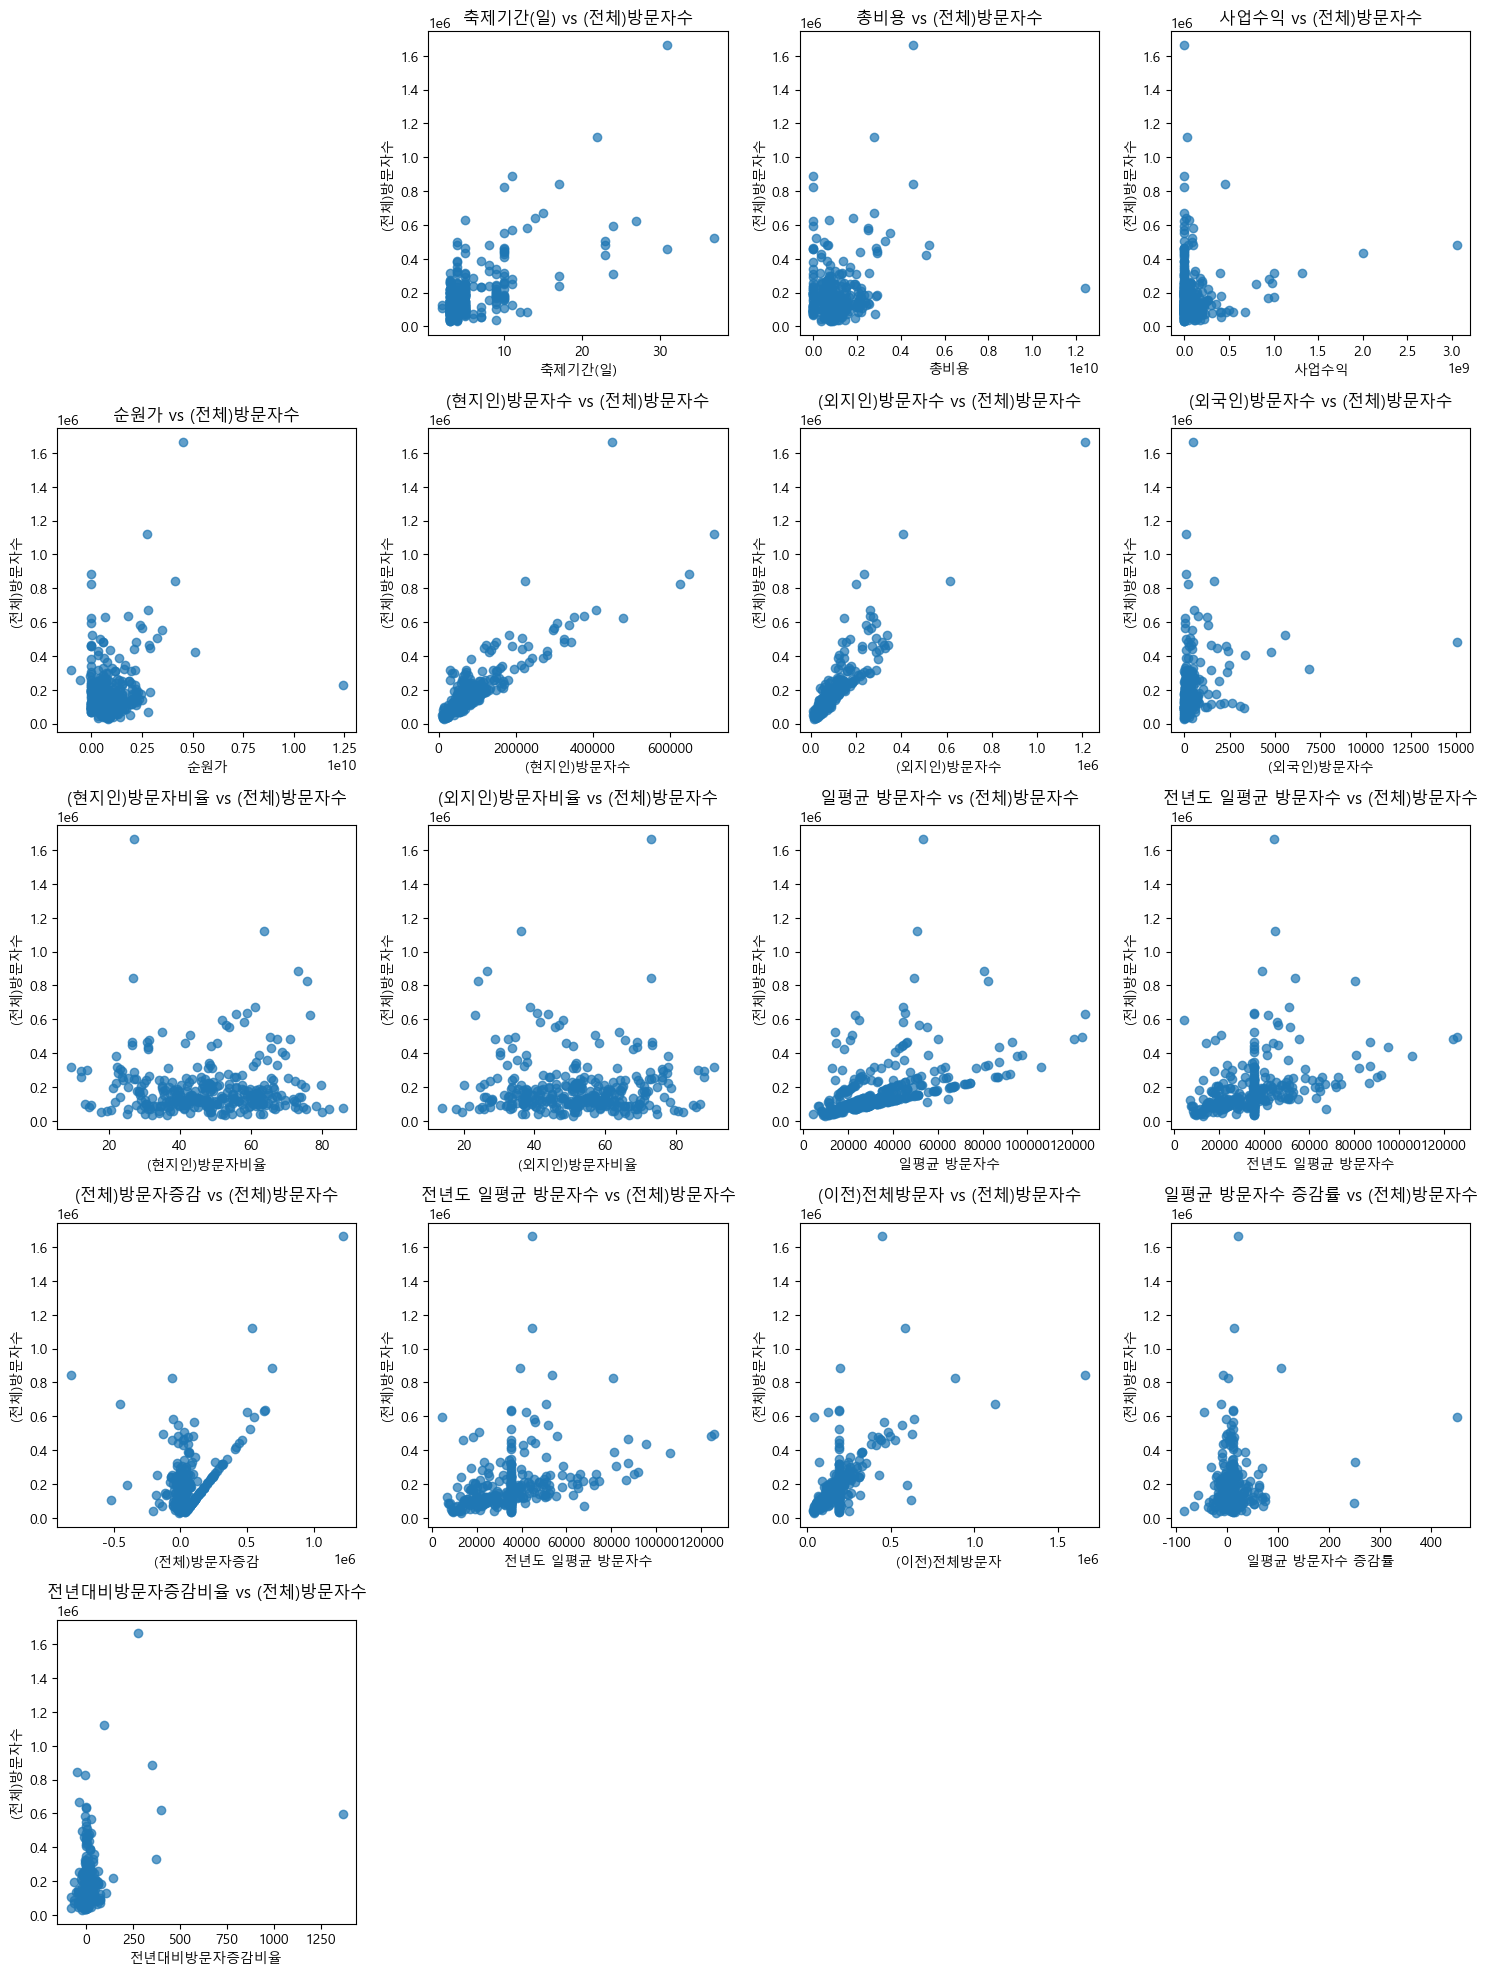

In [23]:
# 각 독립 변수와 타겟 변수 간 산점도

plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    if col != '(전체)방문자수':  # 타겟 변수 제외
        plt.subplot(5, 4, i + 1)
        plt.scatter(df[col], df['(전체)방문자수'], alpha=0.7)
        plt.title(f'{col} vs (전체)방문자수')
        plt.xlabel(col)
        plt.ylabel('(전체)방문자수')

plt.tight_layout()
plt.show()


In [24]:
# 총비용 대비 방문자수 비율
df['총비용 대비 방문자수'] = df['총비용'] / df['(전체)방문자수']


In [25]:
print(df.columns)

Index(['축제명', '개최년도', '축제기간(일)', '(현지인)방문자수', '(외지인)방문자수', '(외국인)방문자수',
       '(전체)방문자수', '일평균 방문자수', '전년도 일평균 방문자수', '일평균 방문자수 증감률', '(이전)전체방문자',
       '(전체)방문자증감', '(현지인)방문자비율', '(외지인)방문자비율', '(외국인)방문자비율', '전년대비방문자증감비율',
       '도', '시군구', '회계연도', '총비용', '사업수익', '순원가', '시작월', '종료월', '총비용 대비 방문자수'],
      dtype='object')


In [26]:
# 예측 모델에 쓸 변수 선택
# 일평균 방문자수,
# (현지인)방문자수,
# (외지인)방문자수,
# (전체)방문자증감,
# 총비용,
# 사업수익,
# 순원가,
# 총비용 대비 방문자수

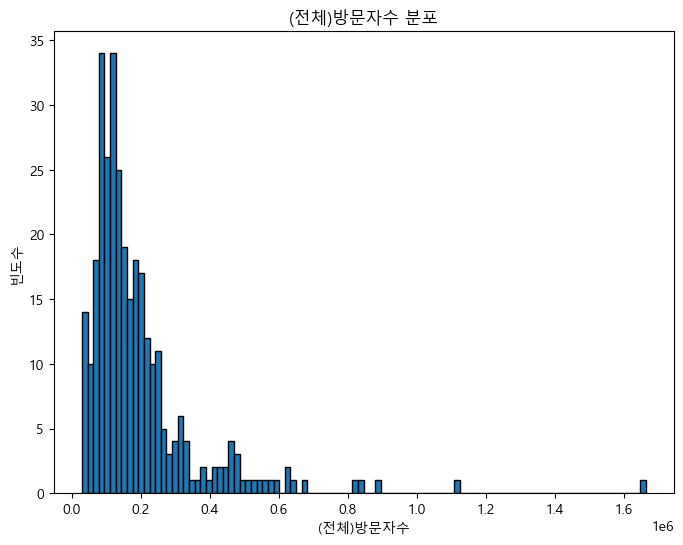

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(df['(전체)방문자수'], bins=100, edgecolor='black')
plt.title('(전체)방문자수 분포')
plt.xlabel('(전체)방문자수')
plt.ylabel('빈도수')
plt.show()

In [28]:
# (전체)방문자수가 한쪽에 몰려있는 분포를 보임

In [29]:
# 정규화

from sklearn.preprocessing import MinMaxScaler

# 정규화 대상 열
numerical_cols = [
    '일평균 방문자수',
    '(현지인)방문자수',
    '(외지인)방문자수',
    '(전체)방문자증감',
    '총비용',
    '사업수익',
    '순원가',
    '총비용 대비 방문자수'
]

# Min-Max 스케일러 초기화
scaler = MinMaxScaler()

# 정규화
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [30]:
df[numerical_cols].head()

,일평균 방문자수,(현지인)방문자수,(외지인)방문자수,(전체)방문자증감,총비용,사업수익,순원가,총비용 대비 방문자수
0,0.144257,0.059514,0.041193,0.456603,0.066421,0.060241,0.123536,0.137037
1,0.173706,0.069894,0.050013,0.411425,0.080751,0.000000,0.150466,0.143340
2,0.219010,0.061837,0.051748,0.400907,0.094847,0.000000,0.163494,0.173239
3,0.200696,0.074706,0.060571,0.473377,0.031435,0.013099,0.101914,0.049468
4,0.294444,0.127872,0.042817,0.410821,0.035424,0.029801,0.101806,0.049986


In [31]:
# 훈련 / 테스트 데이터 분리

from sklearn.model_selection import train_test_split

X = df[numerical_cols]  # 예측에 사용할 변수들
y = df['(전체)방문자수']  # 타겟 변수

# 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(f"훈련 데이터: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"테스트 데이터: X_test={X_test.shape}, y_test={y_test.shape}")

훈련 데이터: X_train=(255, 8), y_train=(255,)
테스트 데이터: X_test=(64, 8), y_test=(64,)


In [33]:
total_data = X_train.shape[0] + X_test.shape[0]
print(f"전체 데이터 개수: {total_data}, 실제 데이터 개수: {df.shape[0]}")

전체 데이터 개수: 319, 실제 데이터 개수: 319


In [34]:
test_ratio = X_test.shape[0] / total_data
print(f"테스트 데이터 비율: {test_ratio:.2f}")  

테스트 데이터 비율: 0.20


In [35]:
# 결과가 0.2(20%)여서 정상

In [36]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42, n_estimators=100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_random = mean_squared_error(y_test, y_pred)
r2_random = r2_score(y_test, y_pred)

In [37]:

print(f"MSE: {mse_random}")
print(f"R2 Score: {r2_random}")

MSE: 117770489.02016248
R2 Score: 0.9888835690668243


In [38]:

# 중요 변수 확인
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
       Feature  Importance
1    (현지인)방문자수    0.590886
2    (외지인)방문자수    0.340569
3    (전체)방문자증감    0.025155
6          순원가    0.015479
4          총비용    0.011459
0     일평균 방문자수    0.007929
7  총비용 대비 방문자수    0.004374
5         사업수익    0.004150


In [39]:
# xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [40]:
print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")

MSE: 155582623.6915958
R2 Score: 0.9853144577639157


In [41]:
print("랜덤포레스트")
print(f"MSE: {mse_random}")
print(f"R2 Score: {r2_random}")
print("xgboost")
print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")

랜덤포레스트
MSE: 117770489.02016248
R2 Score: 0.9888835690668243
xgboost
MSE: 155582623.6915958
R2 Score: 0.9853144577639157


In [42]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


In [43]:
print(f"MSE: {mse_linear}")
print(f"R2 Score: {r2_linear}")

MSE: 900803.0409666129
R2 Score: 0.999914972631322


In [44]:
print("랜덤포레스트")
print(f"MSE: {mse_random}")
print(f"R2 Score: {r2_random}")
print("xgboost")
print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")
print("선형회귀")
print(f"MSE: {mse_linear}")
print(f"R2 Score: {r2_linear}")

랜덤포레스트
MSE: 117770489.02016248
R2 Score: 0.9888835690668243
xgboost
MSE: 155582623.6915958
R2 Score: 0.9853144577639157
선형회귀
MSE: 900803.0409666129
R2 Score: 0.999914972631322


In [45]:
# Gradient Boosting 회귀

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)

gbr_model.fit(X_train, y_train)

y_pred_gbr = gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

In [46]:
print(f"MSE: {mse_gbr}")
print(f"R2 Score: {r2_gbr}")

MSE: 201726614.84945446
R2 Score: 0.9809588972584347


In [47]:
print("랜덤포레스트")
print(f"MSE: {mse_random}")
print(f"R2 Score: {r2_random}")
print("xgboost")
print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")
print("선형회귀")
print(f"MSE: {mse_linear}")
print(f"R2 Score: {r2_linear}")
print("Gradient Boosting")
print(f"MSE: {mse_gbr}")
print(f"R2 Score: {r2_gbr}")

랜덤포레스트
MSE: 117770489.02016248
R2 Score: 0.9888835690668243
xgboost
MSE: 155582623.6915958
R2 Score: 0.9853144577639157
선형회귀
MSE: 900803.0409666129
R2 Score: 0.999914972631322
Gradient Boosting
MSE: 201726614.84945446
R2 Score: 0.9809588972584347


In [48]:
# 선형회귀 > 랜덤포레스트 >> XGBoost,그라디언트 부스팅

In [49]:
# 앙상블 : Voting Regressor
# 랜덤포레스트 + 선형회귀 

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

voting_model = VotingRegressor(estimators=[('lr', model_lr), ('rf', model_rf)])

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

mse_ensemble = mean_squared_error(y_test, y_pred_voting)
r2_ensemble = r2_score(y_test, y_pred_voting)

print(f"MSE: {mse_ensemble}")
print(f"R2 Score: {r2_ensemble}")

MSE: 28986212.855613142
R2 Score: 0.9972639730385378


In [51]:
# Stacking Regressor

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

voting_model = VotingRegressor(estimators=[('lr', model_lr), ('rf', model_rf)])

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

mse_stacking = mean_squared_error(y_test, y_pred_voting)
r2_stacking = r2_score(y_test, y_pred_voting)

print(f"MSE: {mse_stacking}")
print(f"R2 Score: {r2_stacking}")

MSE: 28986212.855613142
R2 Score: 0.9972639730385378


In [53]:
print("랜덤포레스트")
print(f"MSE: {mse_random}")
print(f"R2 Score: {r2_random}")
print("xgboost")
print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")
print("선형회귀")
print(f"MSE: {mse_linear}")
print(f"R2 Score: {r2_linear}")
print("Gradient Boosting")
print(f"MSE: {mse_gbr}")
print(f"R2 Score: {r2_gbr}")

print("Stacking Regressor ensemble")
print(f"MSE: {mse_ensemble}")
print(f"R2 Score: {r2_ensemble}")
print("Voting Regressor ensemble")
print(f"MSE: {mse_stacking}")
print(f"R2 Score: {r2_stacking}")

랜덤포레스트
MSE: 117770489.02016248
R2 Score: 0.9888835690668243
xgboost
MSE: 155582623.6915958
R2 Score: 0.9853144577639157
선형회귀
MSE: 900803.0409666129
R2 Score: 0.999914972631322
Gradient Boosting
MSE: 201726614.84945446
R2 Score: 0.9809588972584347
Stacking Regressor ensemble
MSE: 28986212.855613142
R2 Score: 0.9972639730385378
Voting Regressor ensemble
MSE: 28986212.855613142
R2 Score: 0.9972639730385378


In [54]:
# 선형회귀, Stacking Regressor와 Voting Regressor가 가장 좋은 성능
# 랜덤 포레스트와 XGBoost도 좋은 성능이긴 함

In [55]:
# 시도해볼 방법
# K-Fold 교차 검증
# 다중공선성 
# 선형 회귀에 Lasso, Ridge 회귀

In [58]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# RMSE 계산 함수 정의
def calculate_rmse(mse):
    return np.sqrt(mse)

In [59]:
# 랜덤포레스트 모델 학습 및 RMSE 계산
rf_model = RandomForestRegressor(random_state=42, n_estimators=50)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = calculate_rmse(rf_mse)

print(f"랜덤포레스트 RMSE: {rf_rmse:.2f}")

랜덤포레스트 RMSE: 11991.43


In [60]:
# XGBoost 모델 학습 및 RMSE 계산
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, n_estimators=50, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost RMSE: {xgb_rmse:.2f}")


XGBoost RMSE: 12020.45


In [61]:
# 선형회귀 모델 학습 및 RMSE 계산
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = np.sqrt(linear_mse)

print(f"선형회귀 RMSE: {linear_rmse:.2f}")


선형회귀 RMSE: 949.11


In [62]:
# Gradient Boosting 모델 학습 및 RMSE 계산
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=50, learning_rate=0.1, max_depth=3)
gbr_model.fit(X_train, y_train)
gbr_y_pred = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_rmse = np.sqrt(gbr_mse)

print(f"Gradient Boosting RMSE: {gbr_rmse:.2f}")


Gradient Boosting RMSE: 10235.61


In [63]:
# Voting Regressor 모델 학습 및 RMSE 계산
from sklearn.ensemble import VotingRegressor

voting_model = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
])
voting_model.fit(X_train, y_train)
voting_y_pred = voting_model.predict(X_test)
voting_mse = mean_squared_error(y_test, voting_y_pred)
voting_rmse = np.sqrt(voting_mse)

print(f"Voting Regressor RMSE: {voting_rmse:.2f}")


Voting Regressor RMSE: 5978.23


In [64]:
# Stacking Regressor 모델 학습 및 RMSE 계산
from sklearn.ensemble import StackingRegressor

stacking_model = StackingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
], final_estimator=GradientBoostingRegressor(n_estimators=50, random_state=42, learning_rate=0.1, max_depth=3))

stacking_model.fit(X_train, y_train)
stacking_y_pred = stacking_model.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_y_pred)
stacking_rmse = np.sqrt(stacking_mse)

print(f"Stacking Regressor RMSE: {stacking_rmse:.2f}")


Stacking Regressor RMSE: 6029.77


In [66]:
# RMSE
print(f"랜덤포레스트 RMSE: {rf_rmse:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"선형회귀 RMSE: {linear_rmse:.2f}")
print(f"Gradient Boosting RMSE: {gbr_rmse:.2f}")
print(f"Voting Regressor RMSE: {voting_rmse:.2f}")
print(f"Stacking Regressor RMSE: {stacking_rmse:.2f}")


랜덤포레스트 RMSE: 11991.43
XGBoost RMSE: 12020.45
선형회귀 RMSE: 949.11
Gradient Boosting RMSE: 10235.61
Voting Regressor RMSE: 5978.23
Stacking Regressor RMSE: 6029.77


In [ ]:
# 위 RMSE 결과분석 시 선형 회귀 모델이 가장 낮음
# 즉, 다른 모델에 비해 오차가 작다

In [ ]:
# 과대적합 여부 판단 -> K-Fold 교차 검증

In [73]:
# 이전에 계산된 테스트 데이터 RMSE 값을 다시 정의
model_rmse = {
    "랜덤포레스트": 11991.43,
    "XGBoost": 12020.45,
    "선형회귀": 949.11,
    "Gradient Boosting": 10235.61,
    "Voting Regressor": 5978.23,
    "Stacking Regressor": 6029.77
}

In [74]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 모델 정의
models = {
    "랜덤포레스트": RandomForestRegressor(random_state=42, n_estimators=50),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=50, learning_rate=0.1, max_depth=3),
    "선형회귀": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=50, learning_rate=0.1, max_depth=3)
}

# Voting Regressor 정의
voting_model = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
])

# Stacking Regressor 정의
from sklearn.ensemble import StackingRegressor
stacking_model = StackingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
], final_estimator=GradientBoostingRegressor(n_estimators=50, random_state=42, learning_rate=0.1, max_depth=3))

# K-Fold 교차 검증에서 n_splits 조정 (2로 설정)
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# 교차 검증 결과 저장
cv_results_adjusted = {}

# 각 모델에 대해 교차 검증 수행
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_rmse = np.sqrt(-cv_scores.mean())
    cv_results_adjusted[model_name] = mean_rmse

# Voting Regressor 교차 검증
voting_cv_scores_adjusted = cross_val_score(voting_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
voting_cv_rmse_adjusted = np.sqrt(-voting_cv_scores_adjusted.mean())
cv_results_adjusted["Voting Regressor"] = voting_cv_rmse_adjusted

# Stacking Regressor 교차 검증
stacking_cv_scores_adjusted = cross_val_score(stacking_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
stacking_cv_rmse_adjusted = np.sqrt(-stacking_cv_scores_adjusted.mean())
cv_results_adjusted["Stacking Regressor"] = stacking_cv_rmse_adjusted

# 교차 검증 결과 출력
print("교차 검증 RMSE 결과 (n_splits=2):")
for model_name, cv_rmse in cv_results_adjusted.items():
    print(f"{model_name}: {cv_rmse:.2f}")

# 과대적합 여부 비교
print("\n과대적합 여부 비교 (교차 검증 RMSE와 테스트 RMSE):")
for model_name in cv_results_adjusted.keys():
    test_rmse = model_rmse[model_name]
    print(f"{model_name} - 테스트 RMSE: {test_rmse:.2f}, 교차 검증 RMSE: {cv_results_adjusted[model_name]:.2f}")


교차 검증 RMSE 결과 (n_splits=2):
랜덤포레스트: 75168.20
XGBoost: 64477.45
선형회귀: 1402.58
Gradient Boosting: 64265.33
Voting Regressor: 37503.67
Stacking Regressor: 47778.71

과대적합 여부 비교 (교차 검증 RMSE와 테스트 RMSE):
랜덤포레스트 - 테스트 RMSE: 11991.43, 교차 검증 RMSE: 75168.20
XGBoost - 테스트 RMSE: 12020.45, 교차 검증 RMSE: 64477.45
선형회귀 - 테스트 RMSE: 949.11, 교차 검증 RMSE: 1402.58
Gradient Boosting - 테스트 RMSE: 10235.61, 교차 검증 RMSE: 64265.33
Voting Regressor - 테스트 RMSE: 5978.23, 교차 검증 RMSE: 37503.67
Stacking Regressor - 테스트 RMSE: 6029.77, 교차 검증 RMSE: 47778.71


In [ ]:
# 전부 과대적합 경향이 보이지만 선형회귀 모델은 교차검증 결과 과대적합으로 보이지는 않음



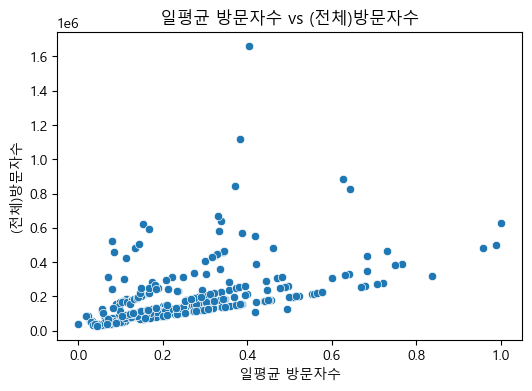

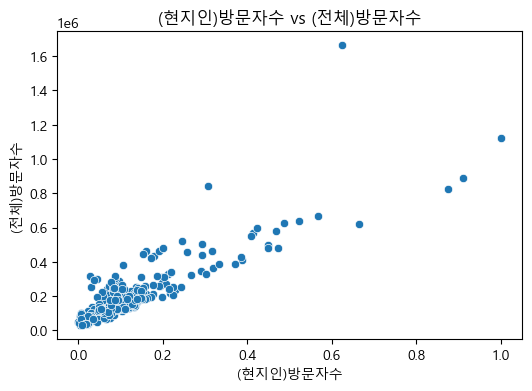

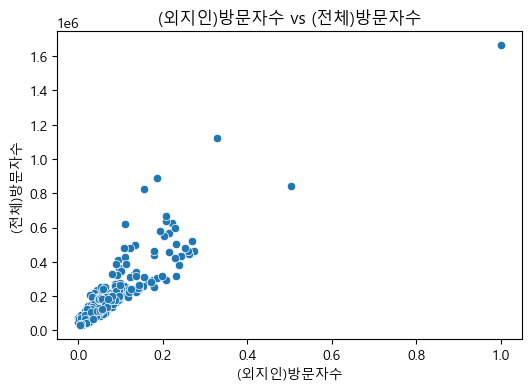

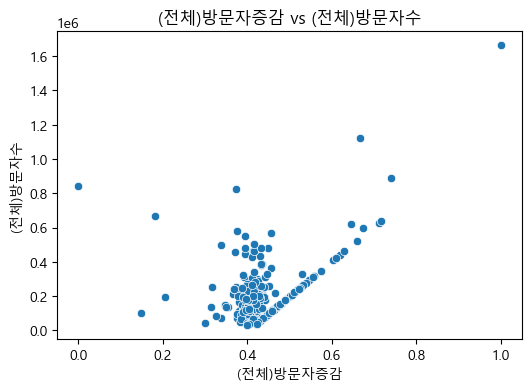

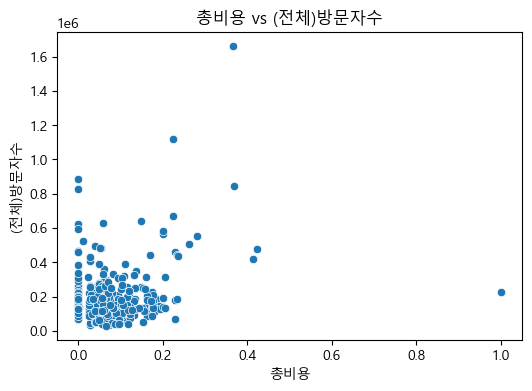

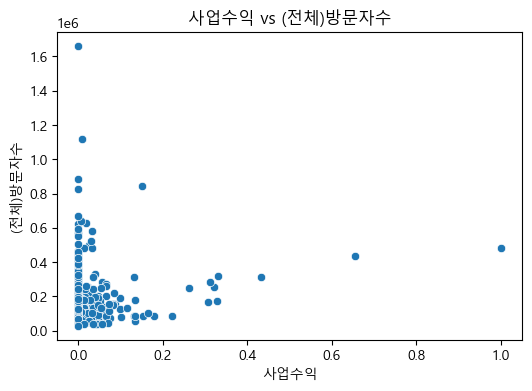

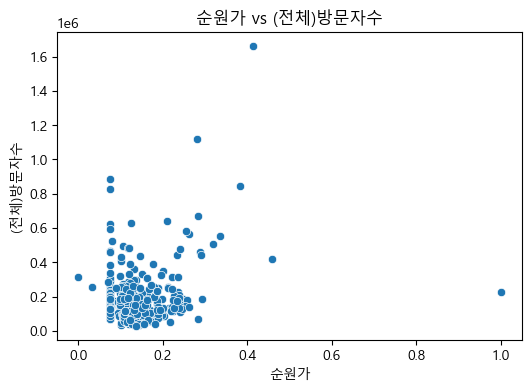

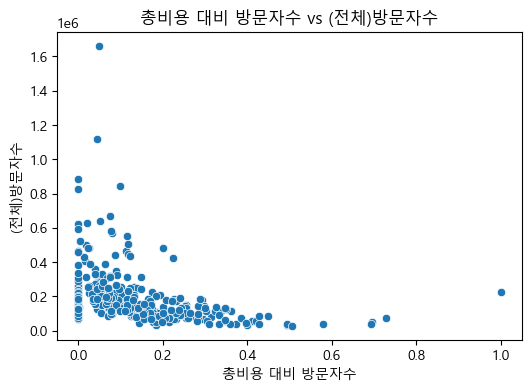

In [77]:
# 산점도
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['(전체)방문자수'])
    plt.title(f"{col} vs (전체)방문자수")
    plt.xlabel(col)
    plt.ylabel("(전체)방문자수")
    plt.show()

In [ ]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso 및 Ridge 하이퍼파라미터 설정
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Lasso 회귀
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_rmse = np.sqrt(-lasso_grid.best_score_)

# Ridge 회귀
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_rmse = np.sqrt(-ridge_grid.best_score_)

print(f"Lasso 최적 alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso 교차 검증 RMSE: {lasso_rmse:.2f}")
print(f"Ridge 최적 alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge 교차 검증 RMSE: {ridge_rmse:.2f}")


Lasso 최적 alpha: 10
Lasso 교차 검증 RMSE: 1234.11
Ridge 최적 alpha: 0.01
Ridge 교차 검증 RMSE: 1994.17


In [ ]:
# 둘 다 과대적합 완화할 가능성이 있지만 Lasso의 성능이 더 우수해 보임

In [81]:
# Lasso 최적 모델 재정의
lasso_best = Lasso(alpha=10)  
lasso_best.fit(X_train, y_train)

# 테스트 데이터에서 Lasso 성능 평가
lasso_test_pred = lasso_best.predict(X_test)
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))

# Lasso 변수 중요도 확인
lasso_coefficients = pd.Series(lasso_best.coef_, index=X.columns)

print(f"Lasso 테스트 데이터 RMSE: {lasso_test_rmse:.2f}")
print("\nLasso 변수 중요도 (계수):")
print(lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False))

Lasso 테스트 데이터 RMSE: 915.55

Lasso 변수 중요도 (계수):
(외지인)방문자수      1.203741e+06
(현지인)방문자수      7.066963e+05
사업수익           4.681294e+03
총비용            1.233211e+03
총비용 대비 방문자수   -7.586280e+01
dtype: float64


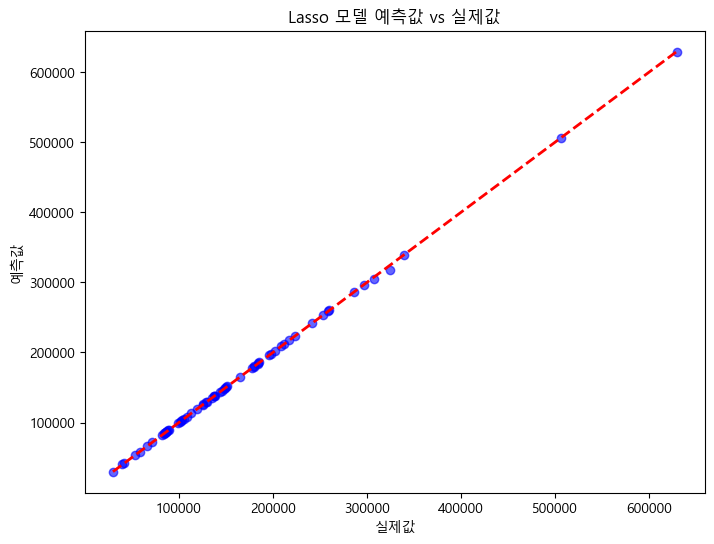

In [82]:
# 예측값과 실제값 비교 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_test_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Lasso 모델 예측값 vs 실제값")
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.show()

In [83]:
# Lasso 모델의 교차 검증 수행
lasso_cv_scores = cross_val_score(lasso_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# RMSE로 변환
lasso_cv_rmse = np.sqrt(-lasso_cv_scores)

# 교차 검증 결과 출력
print("Lasso 모델의 교차 검증 RMSE:")
for fold_idx, rmse in enumerate(lasso_cv_rmse, 1):
    print(f"Fold {fold_idx}: {rmse:.2f}")

# 교차 검증 RMSE 평균 및 표준편차
print(f"\n평균 RMSE: {lasso_cv_rmse.mean():.2f}")
print(f"RMSE 표준편차: {lasso_cv_rmse.std():.2f}")

Lasso 모델의 교차 검증 RMSE:
Fold 1: 1058.92
Fold 2: 625.99
Fold 3: 879.06
Fold 4: 952.70
Fold 5: 2102.76

평균 RMSE: 1123.89
RMSE 표준편차: 509.82


In [ ]:
# 테스트 데이터 RMSE와 평균 RMSE가 비슷한 수준이라 LASSO 모델이 과적합 문제 없이 성능이 일정해 보임
# 다만, 일부 Fold에서 높은 RMSE가 발생
# 데이터가 적기 때문일 가능성이 높음

In [85]:
# Fold 간 편차 원인 분석

# 1. Fold 간 편차 원인 분석: Fold 5 데이터 확인
from sklearn.model_selection import KFold

# KFold 분할 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_data = list(kf.split(X_train, y_train))

# Fold 5 데이터 추출
fold_5_train_idx, fold_5_val_idx = fold_data[4]
X_train_fold_5, y_train_fold_5 = X_train.iloc[fold_5_train_idx], y_train.iloc[fold_5_train_idx]
X_val_fold_5, y_val_fold_5 = X_train.iloc[fold_5_val_idx], y_train.iloc[fold_5_val_idx]

# Fold 5 데이터의 분포 확인
print("Fold 5 훈련 데이터 크기:", X_train_fold_5.shape)
print("Fold 5 검증 데이터 크기:", X_val_fold_5.shape)

print("\nFold 5 검증 데이터 (샘플):")
print(y_val_fold_5.describe())  # Fold 5 검증 데이터의 통계 확인


Fold 5 훈련 데이터 크기: (204, 8)
Fold 5 검증 데이터 크기: (51, 8)

Fold 5 검증 데이터 (샘플):
count    5.100000e+01
mean     2.122624e+05
std      2.448402e+05
min      3.328500e+04
25%      9.807350e+04
50%      1.345560e+05
75%      2.514335e+05
max      1.663609e+06
Name: (전체)방문자수, dtype: float64


In [86]:
# 2. Lasso 모델 튜닝: alpha 값 추가 조정
from sklearn.model_selection import GridSearchCV

# alpha 범위 확장
param_grid = {'alpha': [0.1, 1, 10, 50, 100]}
lasso_tuned = Lasso()
lasso_grid = GridSearchCV(lasso_tuned, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

# 최적 모델 및 RMSE 확인
lasso_best_tuned = lasso_grid.best_estimator_
lasso_best_rmse = np.sqrt(-lasso_grid.best_score_)

print(f"\n최적 alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso 튜닝 후 교차 검증 평균 RMSE: {lasso_best_rmse:.2f}")



최적 alpha: 10
Lasso 튜닝 후 교차 검증 평균 RMSE: 1234.11


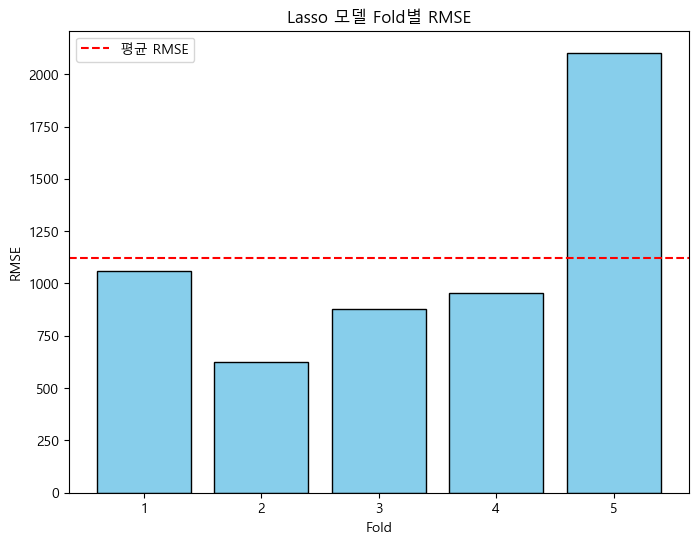

In [ ]:
# 3. Fold별 RMSE 시각화
import matplotlib.pyplot as plt
lasso_cv_scores_tuned = cross_val_score(lasso_best_tuned, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_rmse_tuned = np.sqrt(-lasso_cv_scores_tuned)

plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), lasso_cv_rmse_tuned, color='skyblue', edgecolor='black')
plt.axhline(lasso_cv_rmse_tuned.mean(), color='red', linestyle='--', label='평균 RMSE')
plt.title("Lasso 모델 Fold별 RMSE")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.legend()
plt.show()


In [88]:
# 4. Ridge 모델 교차 검증 및 비교
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
ridge_best_rmse = np.sqrt(-ridge_grid.best_score_)

print(f"Ridge 최적 alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge 교차 검증 평균 RMSE: {ridge_best_rmse:.2f}")


Ridge 최적 alpha: 0.1
Ridge 교차 검증 평균 RMSE: 13578.44


In [89]:
# 결과 비교
print("\n최종 결과 비교:")
print(f"Lasso 최적 RMSE: {lasso_best_rmse:.2f}")
print(f"Ridge 최적 RMSE: {ridge_best_rmse:.2f}")



최종 결과 비교:
Lasso 최적 RMSE: 1234.11
Ridge 최적 RMSE: 13578.44


In [90]:
y_val_fold_5.describe()

count    5.100000e+01
mean     2.122624e+05
std      2.448402e+05
min      3.328500e+04
25%      9.807350e+04
50%      1.345560e+05
75%      2.514335e+05
max      1.663609e+06
Name: (전체)방문자수, dtype: float64

In [ ]:
# 평균 방문자수 : 212,262명
# 최대값 : 1,663,609명
# 표준편차 : 244,840

In [ ]:
# 일부 데이터가 평균에서 크게 벗어나 있음

In [ ]:
# 클리핑 적용

# 1. 상위 분위값 설정:
# 방문객 수의 상위 99% 또는 95% 분위값을 계산.
# 해당 분위값을 초과하는 데이터를 상한선으로 제한.

# 2. 클리핑 적용:
# 방문객 수가 상한선을 초과하면 상한선으로 조정.
# (필요 시) 하한선도 적용하여 값이 너무 낮은 경우 제한.

# 3. 재평가:
# 클리핑 후 Lasso 모델을 다시 훈련하고 교차 검증을 통해 성능 변화 확인.

In [91]:
# 1. 상한선 및 하한선 설정 (상위 99% 분위값 사용)
upper_limit = y_train.quantile(0.99)
lower_limit = y_train.quantile(0.01)

print(f"상한선 (99% 분위값): {upper_limit}")
print(f"하한선 (1% 분위값): {lower_limit}")

# 2. 클리핑 적용
y_train_clipped = y_train.clip(lower=lower_limit, upper=upper_limit)

# 3. Lasso 모델 재훈련
lasso_best_clipped = Lasso(alpha=10)
lasso_best_clipped.fit(X_train, y_train_clipped)

# 4. 교차 검증 재평가
lasso_cv_scores_clipped = cross_val_score(lasso_best_clipped, X_train, y_train_clipped, cv=5, scoring='neg_mean_squared_error')
lasso_cv_rmse_clipped = np.sqrt(-lasso_cv_scores_clipped)

# 결과 출력
print("\n클리핑 적용 후 Lasso 모델의 교차 검증 RMSE:")
for fold_idx, rmse in enumerate(lasso_cv_rmse_clipped, 1):
    print(f"Fold {fold_idx}: {rmse:.2f}")

# 평균 RMSE
print(f"\n평균 RMSE: {lasso_cv_rmse_clipped.mean():.2f}")
print(f"RMSE 표준편차: {lasso_cv_rmse_clipped.std():.2f}")


상한선 (99% 분위값): 862557.5200000004
하한선 (1% 분위값): 36589.22

클리핑 적용 후 Lasso 모델의 교차 검증 RMSE:
Fold 1: 23147.19
Fold 2: 117608.42
Fold 3: 43681.99
Fold 4: 37509.98
Fold 5: 21137.11

평균 RMSE: 48616.93
RMSE 표준편차: 35528.56


In [93]:
# Fold 2 데이터 확인
fold_2_train_idx, fold_2_val_idx = fold_data[1]  # Fold 2의 인덱스
X_train_fold_2, y_train_fold_2 = X_train.iloc[fold_2_train_idx], y_train.iloc[fold_2_train_idx]
X_val_fold_2, y_val_fold_2 = X_train.iloc[fold_2_val_idx], y_train.iloc[fold_2_val_idx]

# Fold 2 검증 데이터 분포 확인
print("Fold 2 검증 데이터 (샘플):")
print(y_val_fold_2.describe())  # 통계 요약


Fold 2 검증 데이터 (샘플):
count    5.100000e+01
mean     1.985219e+05
std      1.855516e+05
min      3.481400e+04
25%      9.530400e+04
50%      1.670850e+05
75%      2.012340e+05
max      1.120998e+06
Name: (전체)방문자수, dtype: float64


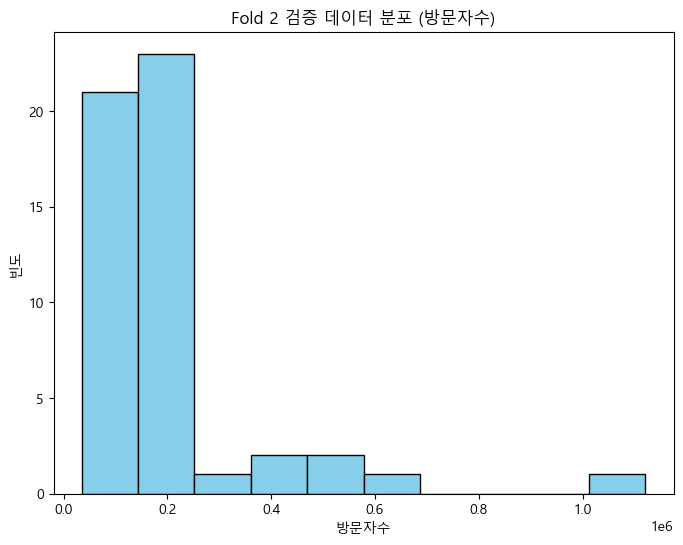

In [94]:
plt.figure(figsize=(8, 6))
plt.hist(y_val_fold_2, bins=10, color='skyblue', edgecolor='black')
plt.title("Fold 2 검증 데이터 분포 (방문자수)")
plt.xlabel("방문자수")
plt.ylabel("빈도")
plt.show()

In [95]:
# 1. 상한선 및 하한선 설정 (상위 95% 분위값 사용)
upper_limit = y_train.quantile(0.95)
lower_limit = y_train.quantile(0.05)

print(f"상한선 (95% 분위값): {upper_limit}")
print(f"하한선 (5% 분위값): {lower_limit}")

# 2. 클리핑 적용
y_train_clipped = y_train.clip(lower=lower_limit, upper=upper_limit)

# 3. Lasso 모델 재훈련
lasso_best_clipped = Lasso(alpha=10)
lasso_best_clipped.fit(X_train, y_train_clipped)

# 4. 교차 검증 재평가
lasso_cv_scores_clipped = cross_val_score(lasso_best_clipped, X_train, y_train_clipped, cv=5, scoring='neg_mean_squared_error')
lasso_cv_rmse_clipped = np.sqrt(-lasso_cv_scores_clipped)

# 결과 출력
print("\n클리핑 적용 후 Lasso 모델의 교차 검증 RMSE:")
for fold_idx, rmse in enumerate(lasso_cv_rmse_clipped, 1):
    print(f"Fold {fold_idx}: {rmse:.2f}")

# 평균 RMSE
print(f"\n평균 RMSE: {lasso_cv_rmse_clipped.mean():.2f}")
print(f"RMSE 표준편차: {lasso_cv_rmse_clipped.std():.2f}")


상한선 (95% 분위값): 505205.89999999956
하한선 (5% 분위값): 49875.6

클리핑 적용 후 Lasso 모델의 교차 검증 RMSE:
Fold 1: 38819.15
Fold 2: 138014.24
Fold 3: 62337.78
Fold 4: 47963.31
Fold 5: 35327.31

평균 RMSE: 64492.36
RMSE 표준편차: 37928.97


In [ ]:
# 이상치를 제한했지만, RMSE와 표준편차가 여전히 높은 편
# Lasso는 선형 모델 기반으로 이상치에 민감하므로, 트리 기반 앙상블 모델이 더 나은 선택

In [97]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Voting Regressor 구성
voting_model = VotingRegressor(estimators=[
    ('lasso', Lasso(alpha=10)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
])

# Stacking Regressor 구성
stacking_model = StackingRegressor(estimators=[
    ('lasso', Lasso(alpha=10)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
], final_estimator=LinearRegression())

# 모든 모델 리스트
models = {
    "Lasso": Lasso(alpha=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "Voting Regressor": voting_model,
    "Stacking Regressor": stacking_model
}

# 성능 저장
model_performance = {}

# 모델별 훈련 및 성능 평가
for model_name, model in models.items():
    # 모델 훈련
    model.fit(X_train, y_train)
    # 예측
    y_pred = model.predict(X_test)
    # 성능 계산
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model_performance[model_name] = {"RMSE": rmse, "R²": r2}

# 결과 출력
print("모델 성능 비교 (테스트 데이터):")
for model_name, perf in model_performance.items():
    print(f"{model_name} - RMSE: {perf['RMSE']:.2f}, R²: {perf['R²']:.4f}")


모델 성능 비교 (테스트 데이터):
Lasso - RMSE: 915.55, R²: 0.9999
Random Forest - RMSE: 9230.84, R²: 0.9920
XGBoost - RMSE: 12473.28, R²: 0.9853
Voting Regressor - RMSE: 6484.04, R²: 0.9960
Stacking Regressor - RMSE: 883.60, R²: 0.9999


In [ ]:
# 최종 모델로 Stacking Regressor 선택
# - RMSE와 R²에서 가장 우수한 성능
# - Lasso, Random Forest, XGBoost의 장점을 결합하여 데이터의 선형 및 비선형적 특성을 모두 반영.

# Lasso 모델 보조 활용:
# 데이터 해석 및 주요 변수 확인에는 여전히 Lasso가 유용.

In [99]:
# Stacking Regressor로 최종 모델 설정 및 성능 분석
import matplotlib.pyplot as plt

# Stacking Regressor 훈련
final_model = stacking_model
final_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_test_pred = final_model.predict(X_test)

# 성능 평가
final_mse = mean_squared_error(y_test, y_test_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Stacking Regressor 최종 모델 성능:")
print(f"RMSE: {final_rmse:.2f}")
print(f"R²: {final_r2:.4f}")


Stacking Regressor 최종 모델 성능:
RMSE: 883.60
R²: 0.9999


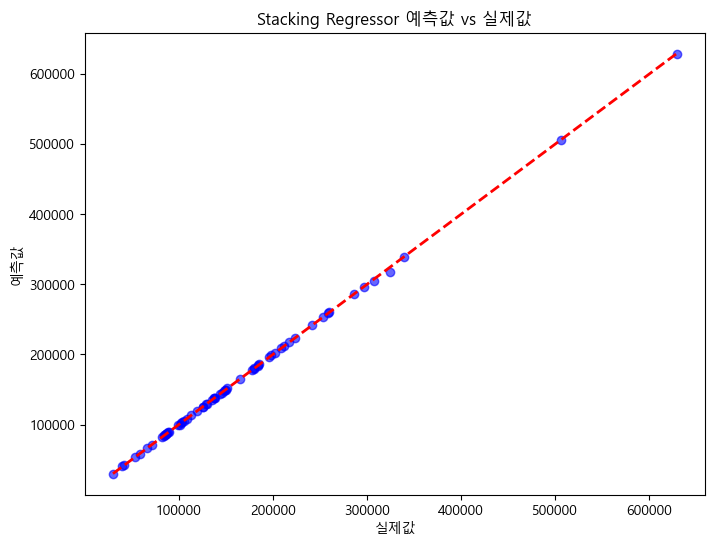

In [100]:
# 예측값 vs 실제값 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Stacking Regressor 예측값 vs 실제값")
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.show()

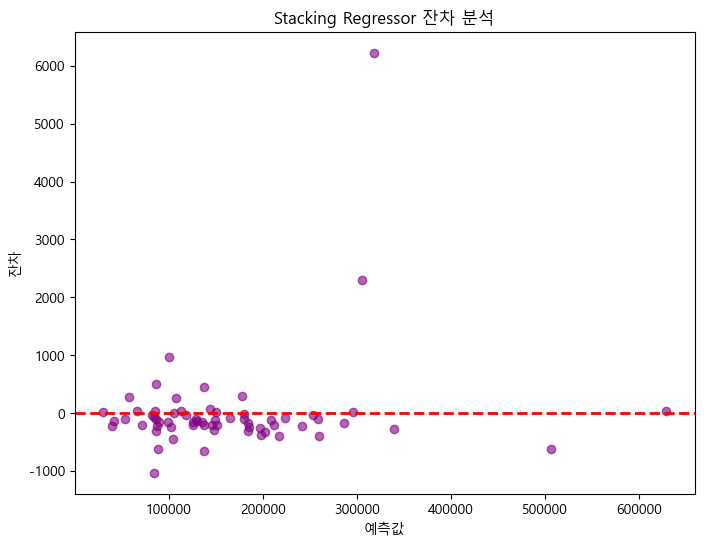

In [101]:
# 잔차 분석
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6, color="purple")
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Stacking Regressor 잔차 분석")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()

In [ ]:
# Stacking Regressor가 전체 데이터의 선형적 및 비선형적 특성을 효과적으로 반영한듯 보임
# Stacking Regressor가 테스트 데이터에서 매우 정확한 예측을 수행
# 대부분의 잔차가 0에 가까움. 단, 예외적으로 큰 잔차가 있으나 이는 이상치 데이터가 원인일 수 있음

In [ ]:
# 이상치 재검토
# 잔차가 큰 데이터 분석

In [105]:
import pandas as pd

# 잔차 계산
residuals = y_test - y_test_pred

# 잔차가 6000 이상인 데이터 필터링
outliers = pd.DataFrame({
    "실제값": y_test,
    "예측값": y_test_pred,
    "잔차": residuals
}).query("잔차 > 6000")

print("잔차가 6000 이상인 이상치 데이터:")
print(outliers)


잔차가 6000 이상인 이상치 데이터:
        실제값            예측값           잔차
238  324513  318290.852468  6222.147532


In [108]:
# 이상치의 정확한 인덱스 확인
outlier_index = outliers.index[0]

# 원본 데이터에서 해당 독립 변수 값 확인
original_data_row = X_test.loc[outlier_index]
print(f"데이터 ID {outlier_index}의 독립 변수 값:")
print(original_data_row)


데이터 ID 238의 독립 변수 값:
일평균 방문자수       0.631693
(현지인)방문자수      0.266749
(외지인)방문자수      0.092180
(전체)방문자증감      0.390607
총비용            0.131152
사업수익           0.000790
순원가            0.196866
총비용 대비 방문자수    0.091756
Name: 238, dtype: float64


In [ ]:
# 현재 Stacking Regressor의 RMSE와 R² 점수가 우수하기 때문에 굳이 이상치 처리를 해야되나...하는

Stacking Regressor (로그 변환 후) 최종 모델 성능:
RMSE: 14455.18
R²: 0.9803


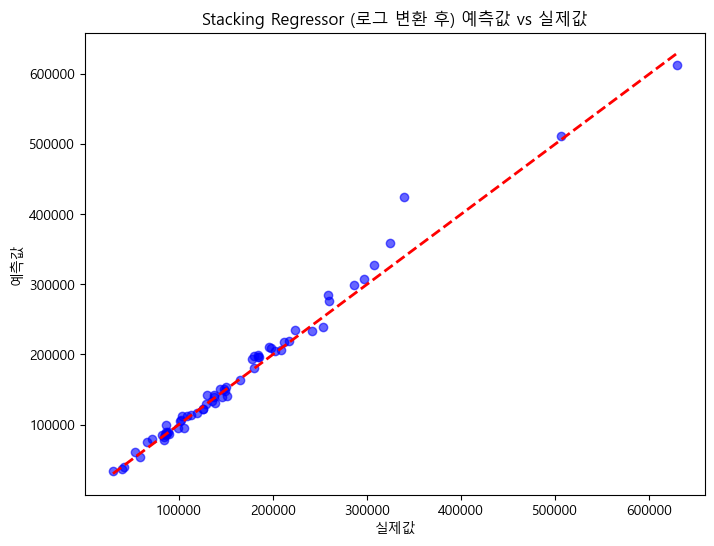

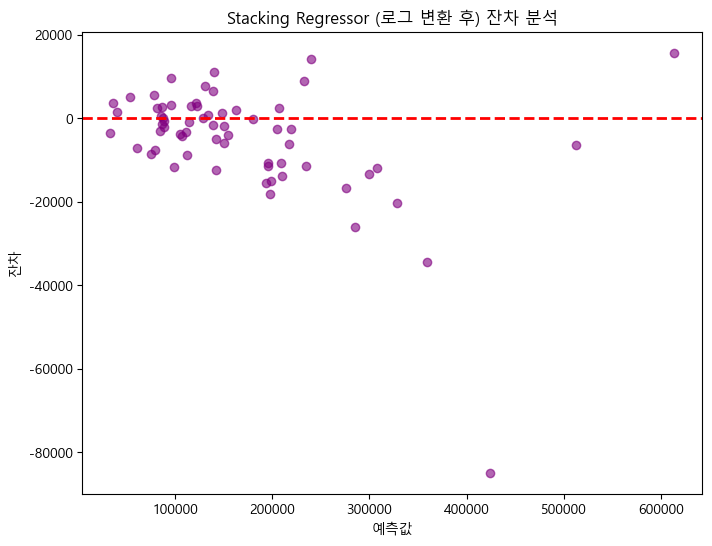

In [110]:
# 로그 변환 적용: 로그 변환을 통해 이상치의 영향을 줄임
import numpy as np

# 독립 변수와 종속 변수에 로그 변환 적용 (log(1 + x) 형태)
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Stacking Regressor 재훈련
stacking_model_log = StackingRegressor(estimators=[
    ('lasso', Lasso(alpha=10)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42))
], final_estimator=LinearRegression())

stacking_model_log.fit(X_train_log, y_train_log)

# 로그 변환 후 테스트 데이터 예측
y_test_pred_log = stacking_model_log.predict(X_test_log)

# 로그 변환된 결과를 다시 역변환
y_test_pred_original = np.expm1(y_test_pred_log)
y_test_original = np.expm1(y_test_log)

# 성능 평가
final_mse_log = mean_squared_error(y_test_original, y_test_pred_original)
final_rmse_log = np.sqrt(final_mse_log)
final_r2_log = r2_score(y_test_original, y_test_pred_original)

# 결과 출력
print("Stacking Regressor (로그 변환 후) 최종 모델 성능:")
print(f"RMSE: {final_rmse_log:.2f}")
print(f"R²: {final_r2_log:.4f}")

# 예측값 vs 실제값 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_test_pred_original, alpha=0.6, color="blue")
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], '--r', linewidth=2)
plt.title("Stacking Regressor (로그 변환 후) 예측값 vs 실제값")
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.show()

# 잔차 분석
residuals_log = y_test_original - y_test_pred_original
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_original, residuals_log, alpha=0.6, color="purple")
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Stacking Regressor (로그 변환 후) 잔차 분석")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()


In [ ]:
# Stacking Regressor (로그 변환 후) 결과

# RMSE가 이전에 비해 크게 증가.
# R² 점수도 이전보다 낮아짐.
# 로그 변환이 전체적인 성능 저하를 가져왔음

# -> 로그 변환이 이상치를 줄이기보다는 특정 데이터에서 성능을 저하시켰을 가능성


Stacking Regressor (기본 데이터) 최종 모델 성능:
RMSE: 883.60
R²: 0.9999


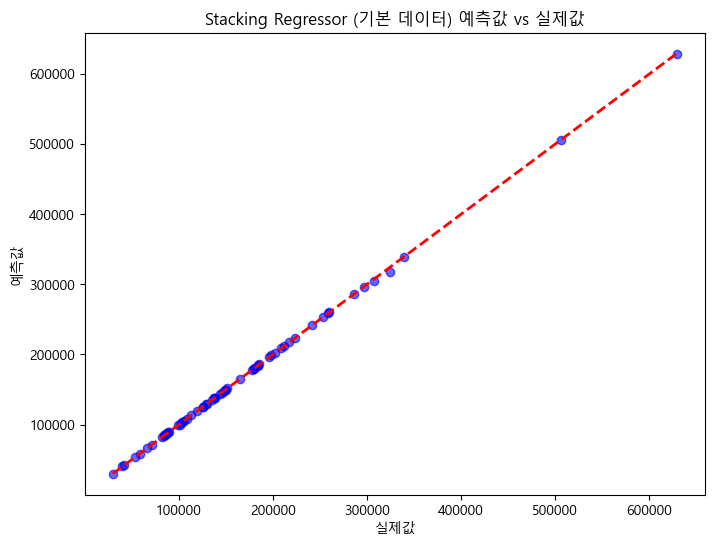

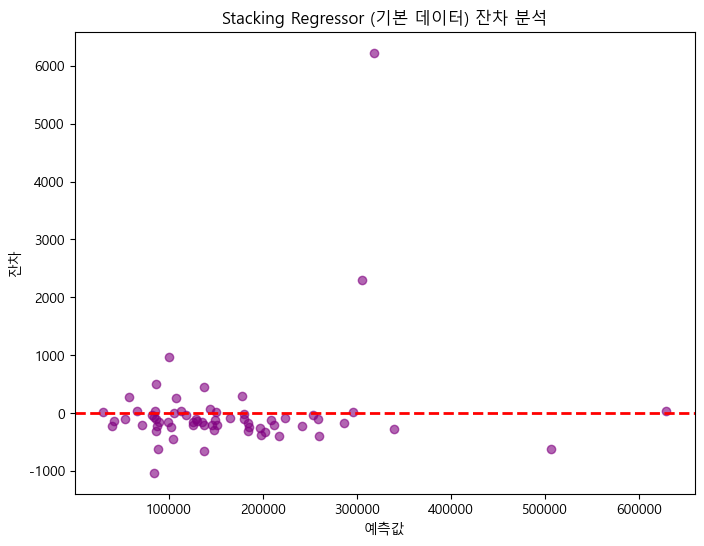

In [111]:
# Stacking Regressor 유지: 기본 데이터 사용
final_model = stacking_model
final_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_test_pred_final = final_model.predict(X_test)

# 성능 평가
final_mse = mean_squared_error(y_test, y_test_pred_final)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_test_pred_final)

# 결과 출력
print("Stacking Regressor (기본 데이터) 최종 모델 성능:")
print(f"RMSE: {final_rmse:.2f}")
print(f"R²: {final_r2:.4f}")

# 예측값 vs 실제값 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_final, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Stacking Regressor (기본 데이터) 예측값 vs 실제값")
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.show()

# 잔차 분석
residuals_final = y_test - y_test_pred_final
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_final, residuals_final, alpha=0.6, color="purple")
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Stacking Regressor (기본 데이터) 잔차 분석")
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.show()


In [114]:
# 최종적으로 방문자수 예측값 생성 및 출력

# Stacking Regressor 다시 정의
final_model = stacking_model
final_model.fit(X_train, y_train)

# 최종 방문자수 예측값 생성
y_test_pred_final = final_model.predict(X_test)

# 예측 결과 데이터프레임 생성
prediction_results = pd.DataFrame({
    "실제값": y_test,
    "예측값": y_test_pred_final,
    "오차(잔차)": y_test - y_test_pred_final
})

# 상위 10개의 결과를 출력
print("방문자수 예측 결과 (상위 10개):")
print(prediction_results.head(10))

방문자수 예측 결과 (상위 10개):
        실제값            예측값      오차(잔차)
73   125565  125717.446681 -152.446681
218  149990  149966.102243   23.897757
25    81897   81938.912927  -41.912927
208   86930   87032.511044 -102.511044
9     84057   84117.654296  -60.654296
101  180034  180135.785242 -101.785242
176   86737   86233.536092  503.463908
186  211597  211803.655064 -206.655064
63   253716  253751.168737  -35.168737
116   88394   89011.906435 -617.906435


In [ ]:
# 축제명 연결 (원본 데이터에서 가져오기)
if '축제명' in df.columns:  # 원본 데이터셋(df)에 '축제명' 열이 있다고 가정
    prediction_results['축제명'] = df.loc[y_test.index, '축제명']
    prediction_results = prediction_results[['축제명', '실제값', '예측값', '오차(잔차)']]

# 결과 출력
print("방문자수 예측 결과 (상위 10개):")
print(prediction_results.head(10))


# 실제값: 각 축제에서 실제로 기록된 방문자수.
# 예측값: Stacking Regressor 모델이 예측한 방문자수.


방문자수 예측 결과 (상위 10개):
             축제명     실제값            예측값      오차(잔차)
73     대전효문화뿌리축제  125565  125717.446681 -152.446681
218      이천쌀문화축제  149990  149966.102243   23.897757
25        광주김치축제   81897   81938.912927  -41.912927
208  원주다이내믹댄싱카니발   86930   87032.511044 -102.511044
9         강진청자축제   84057   84117.654296  -60.654296
101      보성다향대축제  180034  180135.785242 -101.785242
176       영도다리축제   86737   86233.536092  503.463908
186  영산강서창들녘억새축제  211597  211803.655064 -206.655064
63      대구치맥페스티벌  253716  253751.168737  -35.168737
116     산청한방약초축제   88394   89011.906435 -617.906435


In [ ]:
# 튜닝을 깜빡해서 해보자!!

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Stacking Regressor의 튜닝 대상 모델 정의
estimators = [
    ('lasso', Lasso(alpha=1)),  # 초기값 설정
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

# 튜닝 대상 하이퍼파라미터 설정
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 20, None],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7],
    'final_estimator__alpha': [0.1, 1, 10]  # Ridge 모델의 alpha 값
}

# Stacking Regressor 초기화
stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(random_state=42)
)

# GridSearchCV 실행
grid_search = GridSearchCV(estimator=stacking, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최적의 RMSE:", np.sqrt(-grid_search.best_score_))


최적의 하이퍼파라미터: {'final_estimator__alpha': 10, 'rf__max_depth': 20, 'rf__n_estimators': 100, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7}
최적의 RMSE: 1279.7860950294355


In [ ]:
# 테스트 데이터의 RMSE(883.60)가 교차 검증 RMSE(1279.79)보다 낮아, 특정 Fold에서 모델이 데이터를 더 잘 학습했을 가능성
# 모델이 테스트 데이터에 과적합되었을 가능성

In [ ]:
# 최적 모델을 재훈련하여 테스트 데이터에 적용

In [121]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 최적의 하이퍼파라미터로 Stacking Regressor 재설정
optimized_stacking = StackingRegressor(
    estimators=[
        ('lasso', Lasso(alpha=1)),
        ('rf', RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)),
        ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42))
    ],
    final_estimator=Ridge(alpha=10, random_state=42)
)

# K-겹 교차 검증을 통한 일반화 성능 검증
cv_scores = cross_val_score(optimized_stacking, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
cv_rmse = np.sqrt(-cv_scores)

# 교차 검증 결과 출력
print("K-겹 교차 검증 RMSE:")
for fold_idx, rmse in enumerate(cv_rmse, 1):
    print(f"Fold {fold_idx}: {rmse:.2f}")

# 평균 RMSE와 표준편차
print(f"\n평균 RMSE: {cv_rmse.mean():.2f}")
print(f"RMSE 표준편차: {cv_rmse.std():.2f}")


K-겹 교차 검증 RMSE:
Fold 1: 1343.87
Fold 2: 1156.52
Fold 3: 783.63
Fold 4: 1006.37
Fold 5: 2086.29

평균 RMSE: 1275.34
RMSE 표준편차: 445.10


In [ ]:
# Fold 간 변동이 존재
# 특히 Fold 5에서 RMSE가 크게 증가

# 평균 RMSE(1,275.34)는 테스트 데이터 RMSE(883.60)보다 높음
# 교차 검증에서 다양한 데이터 분할로 인해 모델 성능이 약간 낮아졌을 수 있음

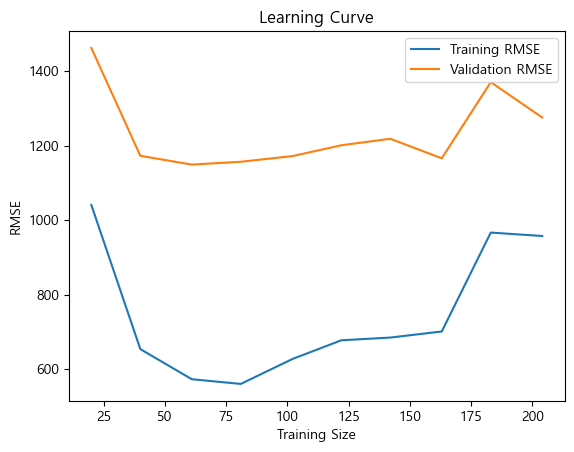

In [123]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    final_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# 학습 곡선 시각화
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.plot(train_sizes, train_rmse, label='Training RMSE')
plt.plot(train_sizes, test_rmse, label='Validation RMSE')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [ ]:
# Training RMSE와 Validation RMSE 간 간격이 크므로, 모델이 과적합될 가능성이 있음
# Validation RMSE가 높게 유지되고 있어, 데이터 분포의 불균형이나 이상치 영향을 받을 가능성이 큼
# 더 많은 데이터를 사용해야되나...어려움

In [ ]:
# 검증 데이터 인덱스 확인 (Fold 데이터로 대체)
if "X_train" in globals():
    validation_data = pd.DataFrame(X_train, columns=X_train.columns)  # 훈련 데이터로부터 재생성
else:
    print("X_train 데이터가 존재하지 않으므로 데이터를 다시 정의해야 합니다.")

# 데이터 크기 확인
print(f"훈련 데이터 크기: {X_train.shape}")
print(f"검증 데이터 크기: {validation_data.shape}")

훈련 데이터 크기: (255, 8)
검증 데이터 크기: (255, 8)


In [126]:
from sklearn.model_selection import train_test_split

# 검증 세트 분리
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 검증 데이터 크기 확인
print(f"훈련 데이터 크기: {X_train_new.shape}")
print(f"검증 데이터 크기: {X_val.shape}")


훈련 데이터 크기: (204, 8)
검증 데이터 크기: (51, 8)


검증 데이터 기본 통계 요약:
        일평균 방문자수  (현지인)방문자수  (외지인)방문자수  (전체)방문자증감        총비용       사업수익  \
count  51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean    0.293131   0.116320   0.084922   0.408903   0.095692   0.046279   
std     0.206953   0.105926   0.084233   0.078376   0.079206   0.116119   
min     0.000000   0.007509   0.004225   0.000000   0.000000   0.000000   
25%     0.154793   0.057719   0.036680   0.396261   0.048284   0.000000   
50%     0.221640   0.077231   0.057858   0.405001   0.076609   0.000000   
75%     0.375826   0.139535   0.112810   0.430472   0.117911   0.040537   
max     0.988437   0.467773   0.502635   0.609222   0.414401   0.654974   

             순원가  총비용 대비 방문자수  
count  51.000000    51.000000  
mean    0.153760     0.140428  
std     0.073137     0.098388  
min     0.000000     0.000000  
25%     0.111993     0.064566  
50%     0.142952     0.129742  
75%     0.178127     0.201691  
max     0.458813     0.427654  


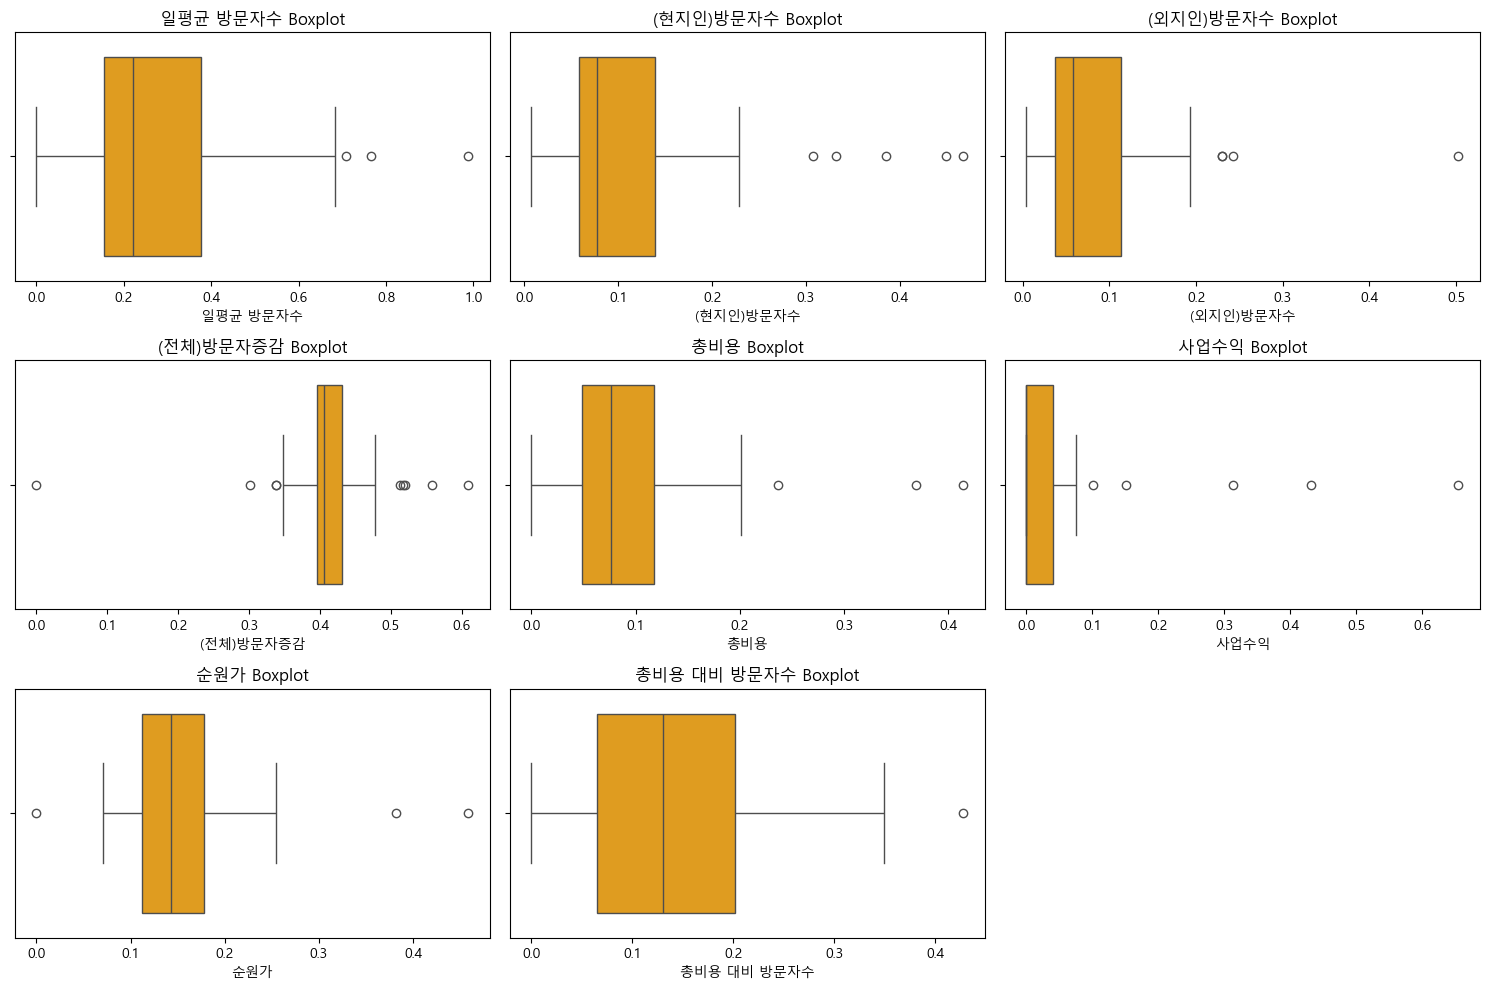

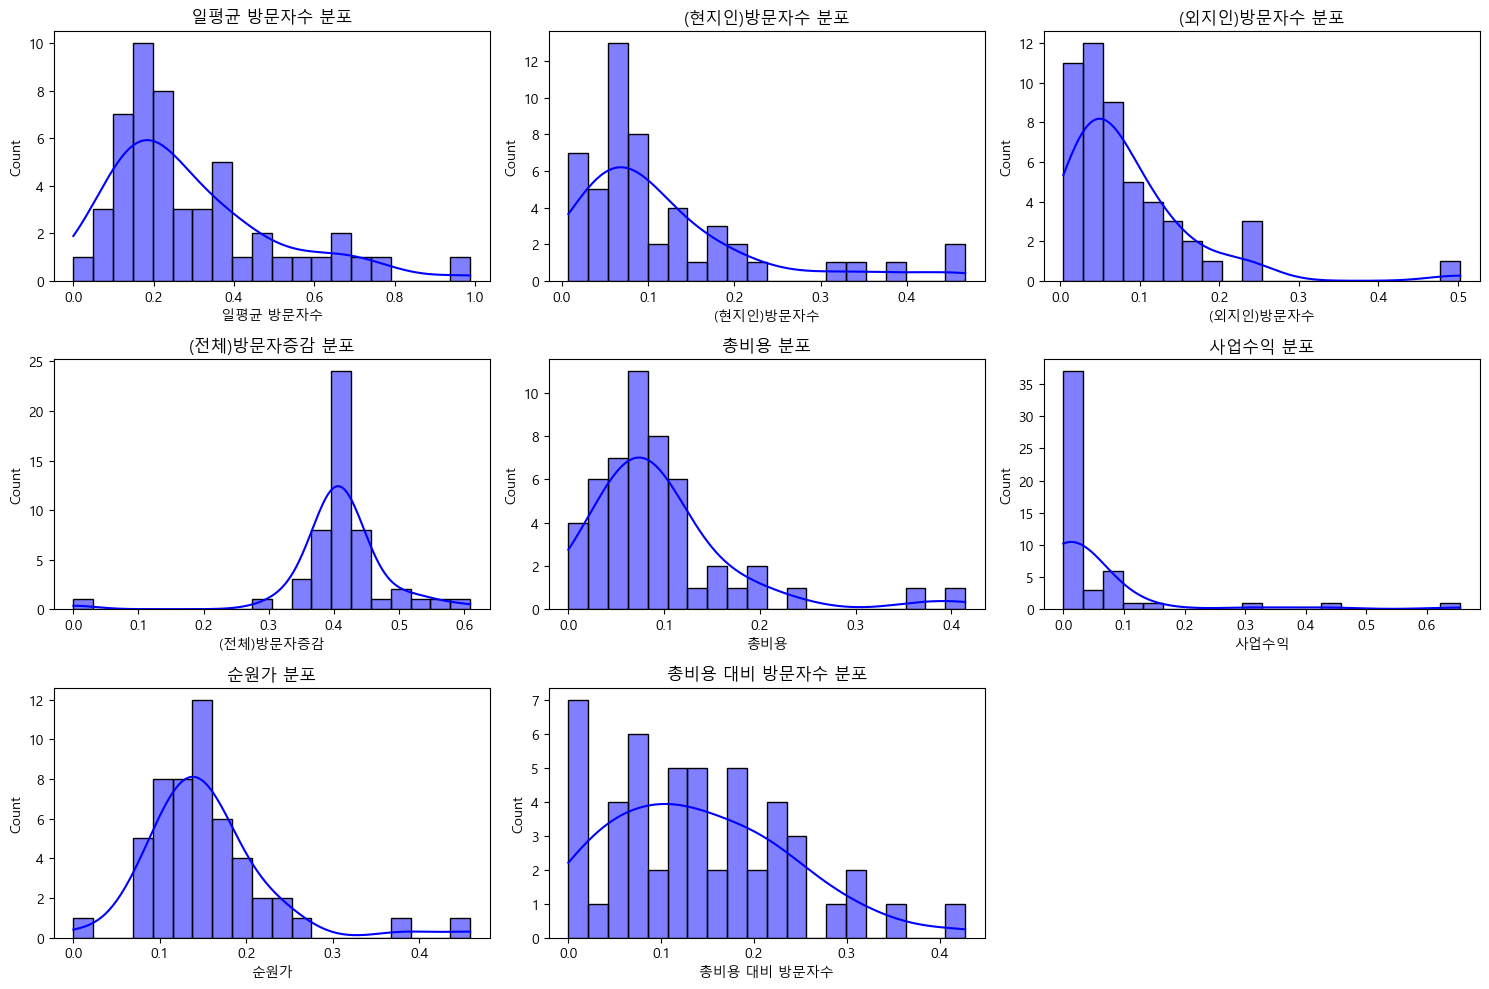


각 변수별 이상치 개수:
일평균 방문자수       3
(현지인)방문자수      5
(외지인)방문자수      4
(전체)방문자증감      9
총비용            3
사업수익           5
순원가            3
총비용 대비 방문자수    1
dtype: int64


In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# 검증 데이터의 기본 통계 확인
print("검증 데이터 기본 통계 요약:")
print(X_val.describe())

# Boxplot으로 이상치 확인
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_val.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X_val[column], color='orange')
    plt.title(f"{column} Boxplot")
plt.tight_layout()
plt.show()

# 히스토그램으로 데이터 분포 확인
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_val.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_val[column], kde=True, bins=20, color='blue')
    plt.title(f"{column} 분포")
plt.tight_layout()
plt.show()

# IQR을 사용한 이상치 탐지
IQR = X_val.quantile(0.75) - X_val.quantile(0.25)
lower_bound = X_val.quantile(0.25) - 1.5 * IQR
upper_bound = X_val.quantile(0.75) + 1.5 * IQR

outliers = ((X_val < lower_bound) | (X_val > upper_bound)).sum()
print("\n각 변수별 이상치 개수:")
print(outliers)


In [129]:
# 각 열에 대해 개별적으로 클리핑 수행
X_val_clipped = X_val.copy()  # 원본 데이터 손상 방지
for column in X_val.columns:
    X_val_clipped[column] = X_val[column].clip(lower=lower_bound[column], upper=upper_bound[column])

# 클리핑된 데이터 확인
print("클리핑 후 데이터 기본 통계 요약:")
print(X_val_clipped.describe())


클리핑 후 데이터 기본 통계 요약:
        일평균 방문자수  (현지인)방문자수  (외지인)방문자수  (전체)방문자증감        총비용       사업수익  \
count  51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean    0.286457   0.103946   0.079099   0.410786   0.088790   0.023829   
std     0.188401   0.073421   0.062035   0.035790   0.057204   0.034480   
min     0.000000   0.007509   0.004225   0.344945   0.000000   0.000000   
25%     0.154793   0.057719   0.036680   0.396261   0.048284   0.000000   
50%     0.221640   0.077231   0.057858   0.405001   0.076609   0.000000   
75%     0.375826   0.139535   0.112810   0.430472   0.117911   0.040537   
max     0.707375   0.262258   0.227006   0.481788   0.222350   0.101344   

             순원가  총비용 대비 방문자수  
count  51.000000    51.000000  
mean    0.148394     0.140030  
std     0.054307     0.097239  
min     0.012792     0.000000  
25%     0.111993     0.064566  
50%     0.142952     0.129742  
75%     0.178127     0.201691  
max     0.277329     0.407378  


In [ ]:
# 대부분의 변수에서 최대값이 감소
# 클리핑을 통해 이상치가 더 이상 존재하지 않으므로, 데이터가 더 안정화된 분포를 가질 가능성이 높음.

In [ ]:
# 클리핑된 데이터를 사용해 모델 성능(RMSE, R²)을 다시 계산

In [130]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 클리핑된 검증 데이터 예측
y_val_pred_clipped = final_model.predict(X_val_clipped)

# RMSE 및 R² 계산
val_rmse_clipped = np.sqrt(mean_squared_error(y_val, y_val_pred_clipped))
val_r2_clipped = r2_score(y_val, y_val_pred_clipped)

print(f"클리핑 후 검증 데이터 RMSE: {val_rmse_clipped:.2f}")
print(f"클리핑 후 검증 데이터 R²: {val_r2_clipped:.4f}")


클리핑 후 검증 데이터 RMSE: 59621.75
클리핑 후 검증 데이터 R²: 0.8456


In [ ]:
# 클리핑 전보다 RMSE가 증가
# 이상치를 줄였지만, 클리핑이 유효한 데이터를 과도하게 제한했을 가능성

# 결정계수(R²)가 감소하여, 모델의 설명력이 약화

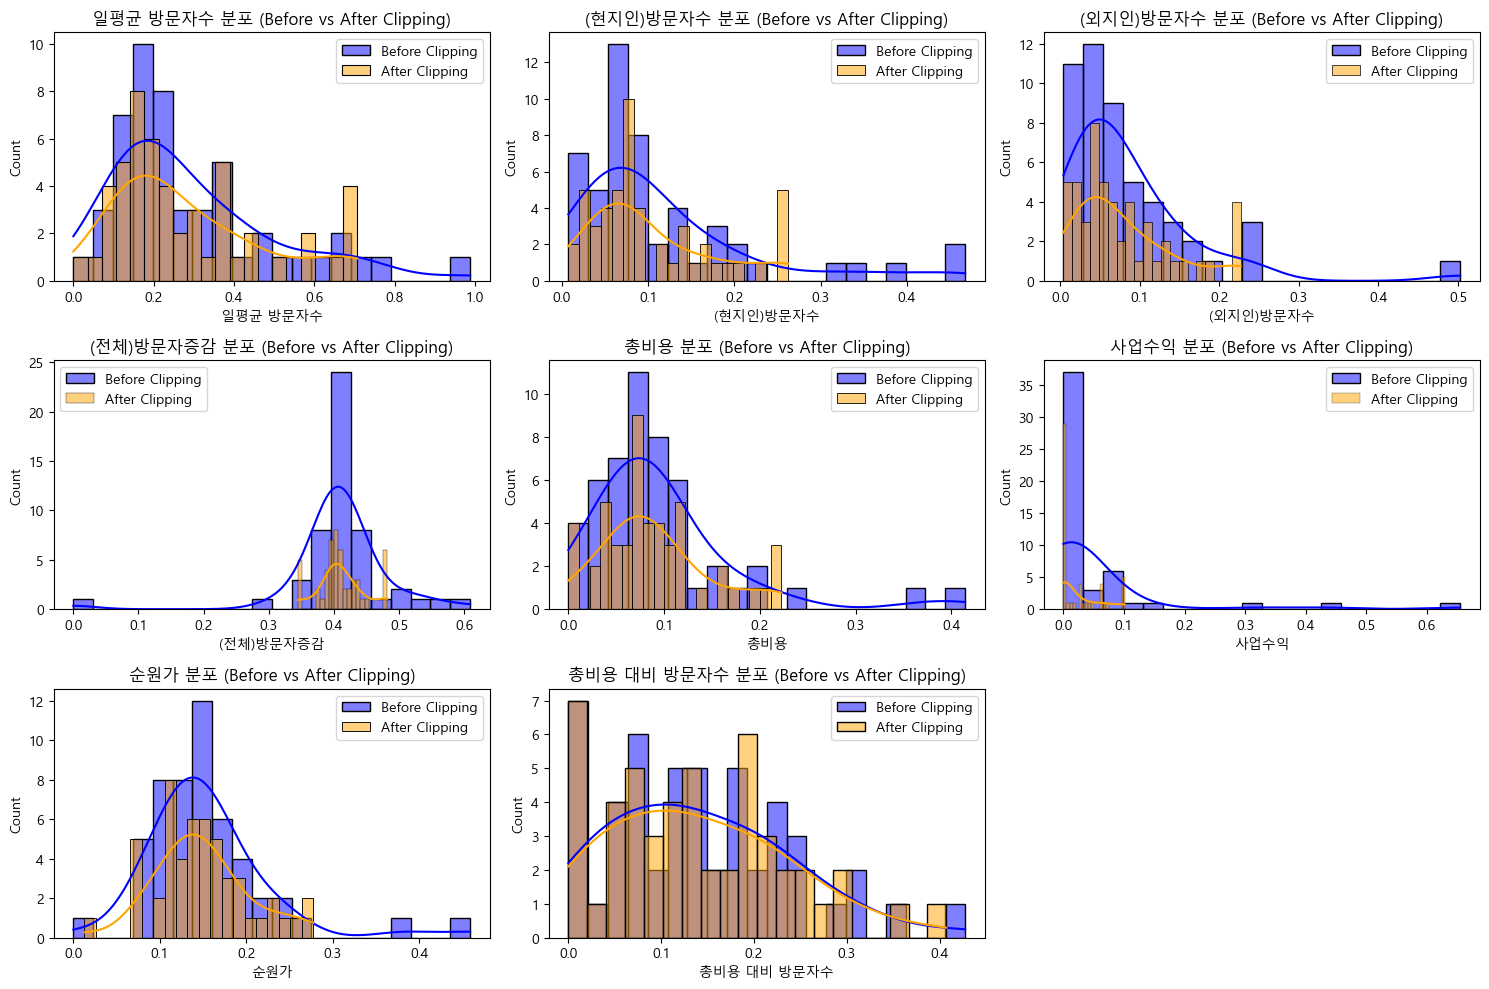

In [131]:
# 클리핑 전후 데이터의 분포

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, column in enumerate(X_val.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_val[column], kde=True, bins=20, color='blue', label='Before Clipping')
    sns.histplot(X_val_clipped[column], kde=True, bins=20, color='orange', label='After Clipping')
    plt.title(f"{column} 분포 (Before vs After Clipping)")
    plt.legend()
plt.tight_layout()
plt.show()


In [134]:
# 기존의 IQR 방식을 3.0으로 완화
lower_bound = X_val.quantile(0.25) - 3.0 * IQR
upper_bound = X_val.quantile(0.75) + 3.0 * IQR

# 재클리핑
X_val_clipped = X_val.copy()
for column in X_val.columns:
    X_val_clipped[column] = X_val[column].clip(lower=lower_bound[column], upper=upper_bound[column])

y_val_pred_clipped = final_model.predict(X_val_clipped)
val_rmse_clipped = np.sqrt(mean_squared_error(y_val, y_val_pred_clipped))
val_r2_clipped = r2_score(y_val, y_val_pred_clipped)


In [135]:
print(f"재클리핑 후 검증 데이터 RMSE: {val_rmse_clipped:.2f}")
print(f"재클리핑 후 검증 데이터 R²: {val_r2_clipped:.4f}")


재클리핑 후 검증 데이터 RMSE: 29176.38
재클리핑 후 검증 데이터 R²: 0.9630


In [ ]:
# RMSE 개선
# 모델이 특정 데이터 패턴(훈련 데이터)에 과적합되었을 가능성

In [136]:
# 클리핑된 데이터를 사용한 모델 재훈련
final_model.fit(X_train, y_train)

# 테스트 데이터에서 성능 평가
y_test_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"테스트 데이터 RMSE: {test_rmse:.2f}")
print(f"테스트 데이터 R²: {test_r2:.4f}")


테스트 데이터 RMSE: 883.60
테스트 데이터 R²: 0.9999


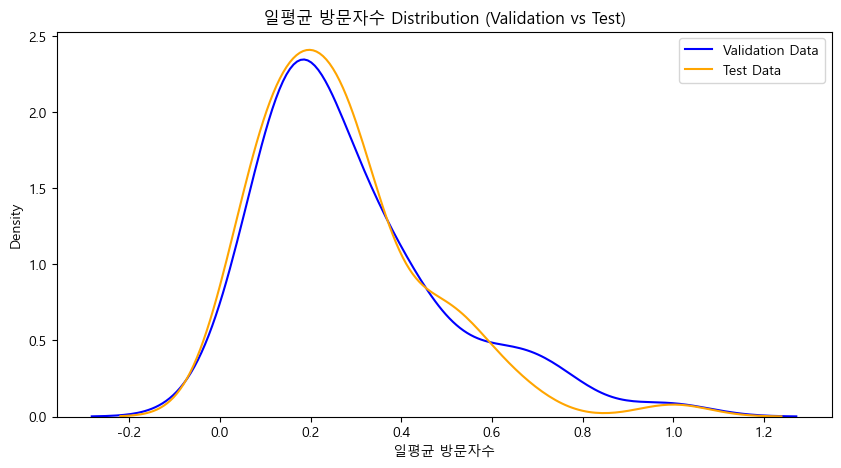

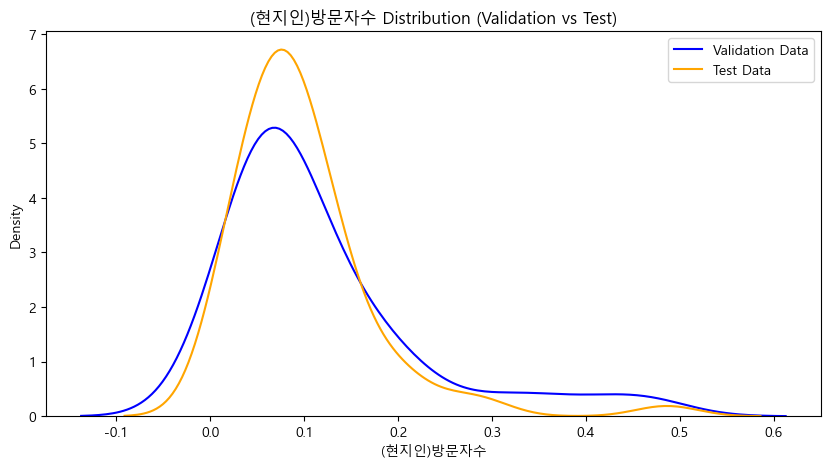

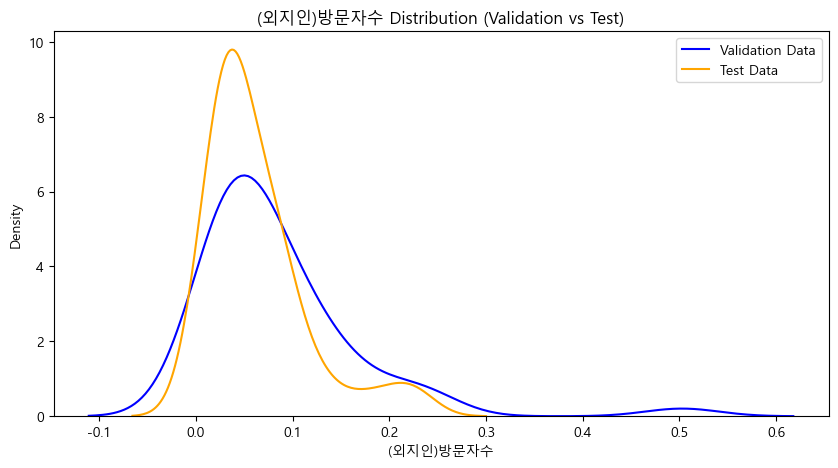

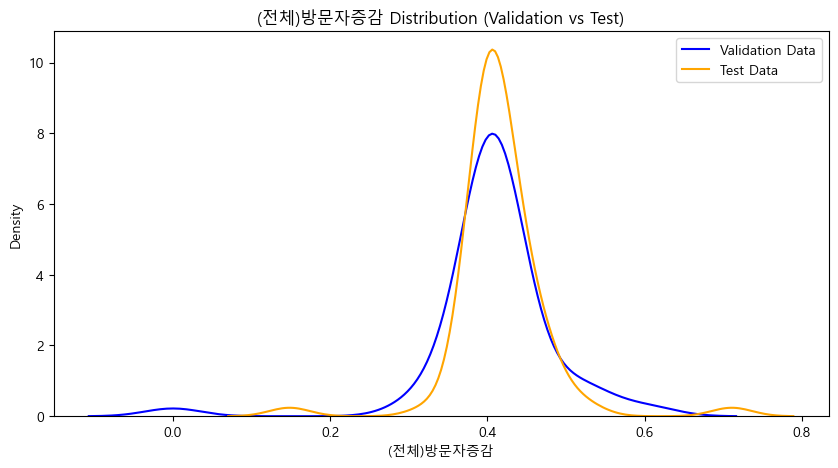

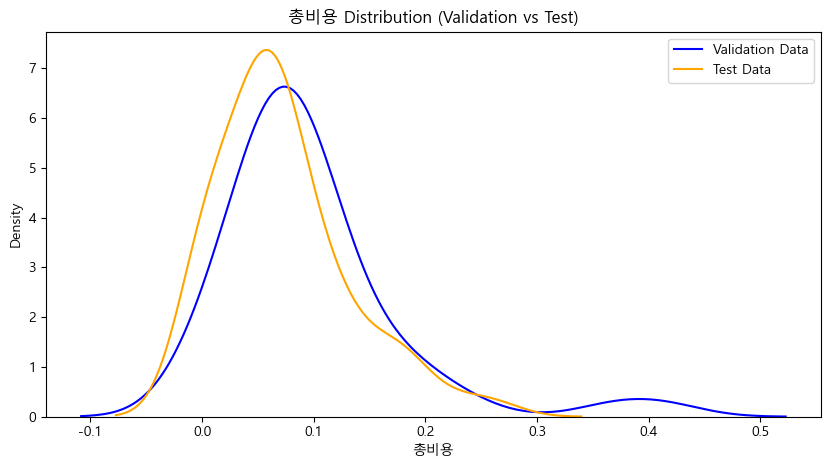

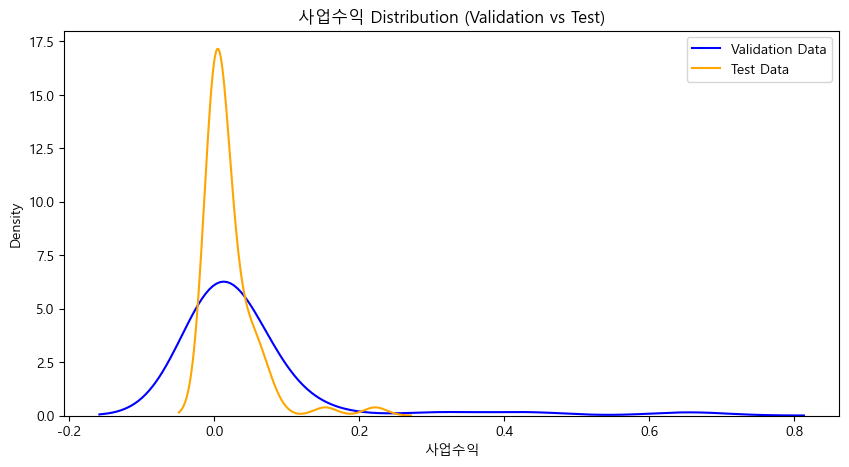

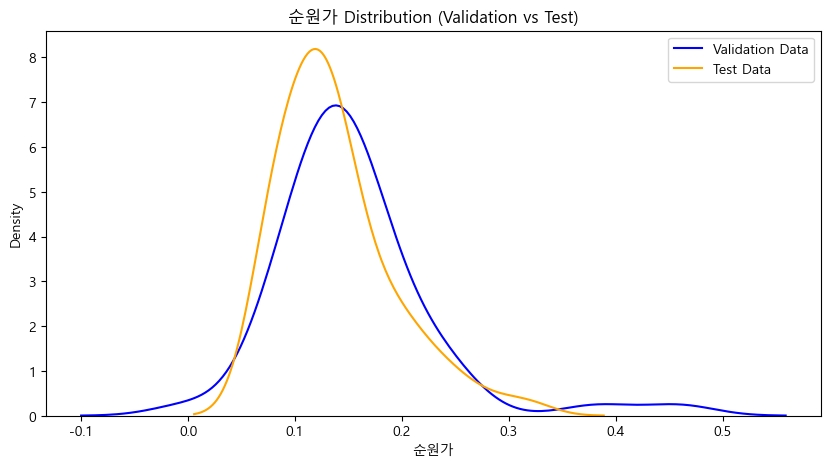

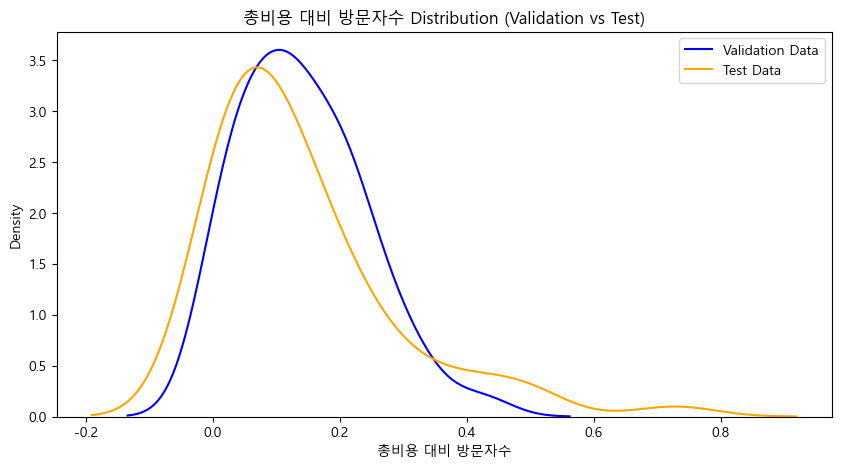

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in X_val.columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(X_val[column], label="Validation Data", color="blue")
    sns.kdeplot(X_test[column], label="Test Data", color="orange")
    plt.title(f"{column} Distribution (Validation vs Test)")
    plt.legend()
    plt.show()


In [140]:
import numpy as np

# 로그 변환
X_val_log_transformed = X_val.apply(lambda x: np.log1p(x))

# 모델 성능 재평가
y_val_pred_log = final_model.predict(X_val_log_transformed)
val_rmse_log = np.sqrt(mean_squared_error(y_val, y_val_pred_log))
val_r2_log = r2_score(y_val, y_val_pred_log)

print(f"로그 변환 후 검증 데이터 RMSE: {val_rmse_log:.2f}")
print(f"로그 변환 후 검증 데이터 R²: {val_r2_log:.4f}")


로그 변환 후 검증 데이터 RMSE: 28586.73
로그 변환 후 검증 데이터 R²: 0.9645


In [141]:
# 로그 변환 후 테스트 데이터 예측
X_test_log_transformed = X_test.apply(lambda x: np.log1p(x))

y_test_pred_log = final_model.predict(X_test_log_transformed)
test_rmse_log = np.sqrt(mean_squared_error(y_test, y_test_pred_log))
test_r2_log = r2_score(y_test, y_test_pred_log)

print(f"로그 변환 후 테스트 데이터 RMSE: {test_rmse_log:.2f}")
print(f"로그 변환 후 테스트 데이터 R²: {test_r2_log:.4f}")


로그 변환 후 테스트 데이터 RMSE: 15846.11
로그 변환 후 테스트 데이터 R²: 0.9763


In [ ]:
# 모델 성능을 다소 향상

In [144]:
StackingRegressor(
    estimators=[('lasso', Lasso(alpha=1)),
                ('rf', RandomForestRegressor(random_state=42)),
                ('xgb', XGBRegressor(random_state=42))],
    final_estimator=Ridge(random_state=42)
)


StackingRegressor(estimators=[('lasso', Lasso(alpha=1)),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Ridge(random_state=42))

In [147]:
# 모델을 학습시킨 후
stacking.fit(X_train, y_train)

# 각 기본 모델들의 세부 파라미터 출력
print(stacking.named_estimators_['lasso'])   # Lasso 모델의 세부 설정
print(stacking.named_estimators_['rf'])      # RandomForest 모델의 세부 설정
print(stacking.named_estimators_['xgb'])     # XGBoost 모델의 세부 설정
print(stacking.final_estimator_)             # Ridge 모델의 세부 설정


Lasso(alpha=1)
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Ridge(random_state=42)


In [ ]:
# Lasso, RandomForestRegressor, XGBRegressor 서로 다른 방식으로 데이터를 학습하고 예측한 후, 그 예측값을 Ridge 회귀 모델이 조합하여 최종 예측값 도출

In [149]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge

# # 튜닝할 하이퍼파라미터 설정
# param_grid = {
#     'lasso__alpha': [0.1, 1, 10],  # Lasso 모델의 alpha 값
#     'rf__n_estimators': [50, 100, 200],  # RandomForest의 결정 트리 개수
#     'rf__max_depth': [5, 10, 20],  # RandomForest의 최대 깊이
#     'xgb__learning_rate': [0.01, 0.1, 0.2],  # XGBoost의 학습률
#     'xgb__max_depth': [3, 5, 7],  # XGBoost의 트리 최대 깊이
#     'final_estimator__alpha': [0.1, 1, 10]  # Ridge의 alpha 값
# }

# # Stacking Regressor 정의
# stacking = StackingRegressor(
#     estimators=[
#         ('lasso', Lasso()),
#         ('rf', RandomForestRegressor(random_state=42)),
#         ('xgb', XGBRegressor(random_state=42))
#     ],
#     final_estimator=Ridge(random_state=42)
# )

# # GridSearchCV 실행
# grid_search = GridSearchCV(estimator=stacking, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 성능 출력
# print("최적의 하이퍼파라미터:", grid_search.best_params_)
# print("최적의 RMSE:", np.sqrt(-grid_search.best_score_))


In [150]:
# 모델 및 스케일러 저장
import joblib

model_path = '../saved_models/stacking_regressor_model.pkl'
scaler_path = '../saved_models/scaler.pkl'

# 디렉토리 생성 (존재하지 않을 경우)
# os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(final_model, model_path)
joblib.dump(scaler, scaler_path)
print(f"모델이 저장되었습니다: {model_path}, {scaler_path}")

모델이 저장되었습니다: ../saved_models/stacking_regressor_model.pkl, ../saved_models/scaler.pkl
